In [1]:
#Test mayavi
%gui qt
from mayavi import mlab
mlab.test_plot3d()
import numpy as np
import mayavi.mlab

In [60]:
#Generate disparity
!python ./psmnet_origin/submission.py    --loadmodel ./psmnet/models/finetune_300.tar   --datapath ./KITTI/object/testing/ --save_path ./result/p

Traceback (most recent call last):
  File "./psmnet_origin/submission.py", line 40, in <module>
    from psmnet.dataloader import KITTI_submission_loader as DA
ModuleNotFoundError: No module named 'psmnet'


In [44]:
#Generate plane
!python ./preprocessing/kitti_process_RANSAC.py --calib ./KITTI/object/training/calib/  --lidar_dir  ./result/psmnet_pl_all/     --planes_dir ./result/psmnet_all_planes

-------------  000000
[-0.00718706 -0.99976261 -0.02056869]
1.6695672074174197
-------------  000001
[-1.06249342e-02 -9.99943393e-01  5.66848241e-04]
1.6543336897891616
-------------  000002
[-0.00497723 -0.99972891  0.02274499]
1.548634412703528
-------------  000003
[-0.05801575 -0.99810676  0.020422  ]
1.570743958911422
-------------  000004
[-0.00100304 -0.99999537  0.00287417]
1.6546444333476724
-------------  000005
[-0.01677747 -0.99985677  0.00222827]
1.6307947425281393
-------------  000006
[-0.01157156 -0.99981688 -0.01524159]
1.6480489915848302
-------------  000007
[-9.02154684e-04 -9.99999104e-01  9.89019317e-04]
1.6703122662854337
-------------  000008
[ 0.02485641 -0.99966789 -0.00680173]
1.6966145255278302
-------------  000009
[-0.00782967 -0.99996025  0.00426633]
1.6441275077393023
-------------  000010
[-0.00442626 -0.99997456  0.00559323]
1.637821423783557
-------------  000011
[-0.03707306 -0.99930989 -0.00230694]
1.655203431676911
-------------  000012
[-0.003361

[-0.01361679 -0.99986126 -0.00959426]
1.7282114463357277
-------------  000179
[-0.01154781 -0.99993107  0.00212011]
1.6556035395391542
-------------  000199
[-0.00593916 -0.99979784 -0.01920957]
1.6561919480400575
-------------  000219
[-0.00985806 -0.9999445   0.0037181 ]
1.6752166916598934
-------------  000239
[-0.03136078 -0.99949116  0.00582352]
1.643875823161161
-------------  000259
[-0.01293851 -0.99979945 -0.01528555]
1.6335438396360396
-------------  000279
[ 0.02127995 -0.99977286 -0.00117829]
1.670311177465543
-------------  000299
[ 0.03522398 -0.99933081  0.00985945]
1.6164595258374357
-------------  000319
[-0.00899371 -0.99994752  0.00490621]
1.6511620476270907
-------------  000339
[-0.03441366 -0.99940556  0.00205762]
1.6476847092357685
-------------  000100
[-0.0279105  -0.99959812  0.00495985]
1.6351362967860243
-------------  000101
[-0.01331441 -0.99989469  0.00577395]
1.647733485388622
-------------  000102
[ 0.00858442 -0.99995849  0.00305398]
1.660886822548631

[-0.02788092 -0.99929148  0.02528232]
1.5468562630838425
-------------  000197
[-0.03168615 -0.99944688  0.01009521]
1.6091009289233613
-------------  000198
[-0.00549095 -0.99997937  0.0033328 ]
1.6685375330405154
-------------  000200
[-0.00836913 -0.99994645  0.0060872 ]
1.6469355223105024
-------------  000201
[-0.02345828 -0.99972028  0.00301047]
1.6315318738651317
-------------  000202
[-0.02699021 -0.99963175  0.00281025]
1.651742952624213
-------------  000203
[-0.00445801 -0.99983637  0.01753191]
1.602444145711449
-------------  000204
[-0.01076092 -0.99991071  0.00792327]
1.6361301502031522
-------------  000205
[-0.01957405 -0.99979059  0.00596981]
1.6471294787411386
-------------  000206
[ 0.01313794 -0.99974261 -0.01849625]
1.6666033787969823
-------------  000207
[-0.0101072  -0.99986392  0.01303764]
1.6278262837760133
-------------  000208
[-1.77755080e-02 -9.99841943e-01  3.45964508e-04]
1.628872564600453
-------------  000209
[-0.0072744  -0.99972493 -0.02229676]
1.673

[-0.01086454 -0.99979055 -0.01734397]
1.6637383493310305
-------------  000306
[-0.02124329 -0.99977132  0.00245692]
1.6154436468091873
-------------  000307
[-0.01514128 -0.99988318  0.00209185]
1.6840146871750636
-------------  000308
[-0.03013497 -0.9995175  -0.00752655]
1.5441703037194547
-------------  000309
[ 0.00598723 -0.99997859 -0.0026405 ]
1.6772249032103141
-------------  000310
[-0.04266145 -0.99908701 -0.0022677 ]
1.6979598904939248
-------------  000311
[ 0.02891475 -0.99954868  0.00814706]
1.6568616942470198
-------------  000312
[-0.06540498 -0.9978581  -0.00118686]
1.7732856343481578
-------------  000313
[-0.00846422 -0.99996355  0.00111848]
1.6759456429827695
-------------  000314
[-0.03130562 -0.999481    0.00759569]
1.7197539296264814
-------------  000315
[-0.01247203 -0.99990704  0.00551064]
1.69250227256832
-------------  000316
[-0.01029126 -0.99994453  0.00224222]
1.657194024627004
-------------  000317
[ 0.02264173 -0.99968094  0.01119658]
1.533692212088969

[-0.0179638  -0.99975726  0.01275627]
1.5603282500061997
-------------  000414
[-0.00331606 -0.99999384  0.00114701]
1.6435659455416576
-------------  000415
[-0.00731852 -0.99997251 -0.00118771]
1.6734747158514665
-------------  000416
[-0.01337528 -0.99988589  0.00702217]
1.6730540979634172
-------------  000417
[-0.03586126 -0.99918398  0.0185833 ]
1.594341281570148
-------------  000418
[-0.00909253 -0.99995538 -0.00256271]
1.6555988587800408
-------------  000420
[-0.02688378 -0.99962664 -0.00488318]
1.6462822281269691
-------------  000421
[-0.01105009 -0.99993787  0.00146573]
1.6484645330383987
-------------  000422
[-0.02100471 -0.99960433 -0.01870783]
1.6498288857447545
-------------  000423
[-0.01528723 -0.99987209  0.0047013 ]
1.6167801504511758
-------------  000424
[-0.02237861 -0.99974658  0.00244481]
1.7034690133287913
-------------  000425
[-0.0172618  -0.99984812  0.00240239]
1.627682898124765
-------------  000426
[ 0.01295837 -0.99991533  0.00118662]
1.66717443528559

[-0.00217104 -0.99996568  0.00799578]
1.6172492331131283
-------------  000523
[-0.00686784 -0.99995987  0.00575174]
1.6626107664530767
-------------  000524
[-0.00790121 -0.99996275  0.00347503]
1.6556890091818957
-------------  000525
[-0.02428669 -0.99969399  0.00469898]
1.6538585082775288
-------------  000526
[-0.01356973 -0.99983235 -0.01229402]
1.6344387200847923
-------------  000527
[-7.52402737e-04 -9.99897353e-01 -1.43079164e-02]
1.6470215781741921
-------------  000528
[-0.00524923 -0.99994859  0.00867553]
1.664618522720297
-------------  000529
[-0.01752994 -0.99984564  0.00118499]
1.6907336267412691
-------------  000530
[ 0.00466291 -0.99991987 -0.01176901]
1.68324521715299
-------------  000531
[-0.02027427 -0.9996524   0.01685349]
1.556097629019002
-------------  000532
[-0.00829384 -0.99966607 -0.02447351]
1.6926013193374772
-------------  000533
[ 3.47083348e-04 -9.99993771e-01  3.51240744e-03]
1.695701725470314
-------------  000534
[ 0.0061476  -0.99996033  0.00644

[-0.03282339 -0.99945384  0.00382784]
1.6187133836237833
-------------  000630
[-0.02052076 -0.99978741 -0.00200935]
1.693572452937608
-------------  000631
[-0.0036886  -0.99999174  0.0017073 ]
1.6367836808981915
-------------  000632
[-0.00541805 -0.99998053 -0.00309539]
1.663093731662531
-------------  000633
[-0.00562862 -0.99975395 -0.02145593]
1.6784497121853412
-------------  000634
[-0.05171025 -0.99865302  0.00426563]
1.6582504732590089
-------------  000635
[-0.01020762 -0.99994383  0.00285239]
1.6601356230128848
-------------  000636
[-0.00744033 -0.99996903 -0.00256556]
1.6603394253288328
-------------  000637
[-0.00975271 -0.99992689 -0.00714826]
1.6035073218561524
-------------  000638
[-7.27156490e-04 -9.99999653e-01  4.07171299e-04]
1.6290149244995882
-------------  000640
[-0.01076581 -0.99978115 -0.01793748]
1.66199278432226
-------------  000641
[-0.04917162 -0.99878832  0.00201094]
1.688383008792787
-------------  000642
[ 7.81558509e-03 -9.99969338e-01 -4.88714020e

[-0.02951891 -0.99954386  0.00638069]
1.6599727886824387
-------------  000737
[-2.30015917e-03 -9.99997174e-01 -6.01228594e-04]
1.6495315789605154
-------------  000738
[ 0.05019457 -0.99870545  0.00824142]
1.6768082905212052
-------------  000379
[-0.00798003 -0.99994811  0.00633212]
1.6363446377612527
-------------  000399
[-0.01260569 -0.99991608  0.00298799]
1.6493368857538653
-------------  000419
[-0.00199074 -0.99997131 -0.00730914]
1.6082385043733207
-------------  000439
[-0.01313157 -0.99988332 -0.00780495]
1.642035670818865
-------------  000459
[-0.01038811 -0.99992816  0.00598072]
1.6419944077019213
-------------  000479
[ 0.00371879 -0.99998255  0.00459066]
1.66501436968399
-------------  000499
[-0.01190402 -0.99992854  0.00109564]
1.642518687078554
-------------  000519
[ 0.00388103 -0.99996789  0.00701154]
1.6406568096181935
-------------  000539
[-0.009989   -0.9999487  -0.00167688]
1.6580542459911665
-------------  000559
[-0.00907449 -0.99989803 -0.01102628]
1.6615

[-0.00800113 -0.9997868  -0.01903527]
1.6565769378346924
-------------  000828
[ 0.01027905 -0.99983789  0.01478326]
1.5606476468037407
-------------  000829
[-0.00575408 -0.99998292  0.00102035]
1.6665199201592464
-------------  000830
[-2.61944641e-03 -9.99996094e-01  9.75219241e-04]
1.6626950544541186
-------------  000831
[-0.00898465 -0.99992375  0.00847153]
1.6655521546862722
-------------  000832
[-0.0044477  -0.99998944  0.00116066]
1.642400204238305
-------------  000833
[ 0.00120257 -0.99999342 -0.00342252]
1.6388751983629308
-------------  000834
[-0.01772888 -0.99980683  0.00848426]
1.6320023908546446
-------------  000835
[-0.02317525 -0.99971012  0.00652545]
1.659906988018383
-------------  000836
[-0.01127785 -0.99993548  0.00136035]
1.6442241970005222
-------------  000837
[ 0.00110267 -0.99997406 -0.00711771]
1.645626763640279
-------------  000838
[-0.03074719 -0.99951557  0.00481931]
1.6943030025195498
-------------  000840
[ 0.00257481 -0.99999108 -0.00334706]
1.628

[-2.90134095e-02 -9.99578743e-01 -7.47290227e-04]
1.64980448919574
-------------  000936
[-0.00143602 -0.99998552  0.00518562]
1.6562627319171401
-------------  000937
[-0.02644387 -0.99964009  0.00451882]
1.6379819593461
-------------  000938
[-0.01285563 -0.99991583 -0.00175292]
1.6449257372052715
-------------  000940
[-0.00218361 -0.99998747  0.00450458]
1.650927661410143
-------------  000941
[-0.05551301 -0.99845482  0.0025071 ]
1.6605407753159487
-------------  000942
[-0.02172926 -0.99969612 -0.01164094]
1.7114530934815397
-------------  000943
[ 6.82527856e-03 -9.99976686e-01 -2.08675843e-04]
1.6456391250649056
-------------  000944
[-0.00661199 -0.999976    0.00207084]
1.6803411260072498
-------------  000945
[ 0.0267645  -0.9994863   0.01762917]
1.6087897043648662
-------------  000946
[-6.60367385e-03 -9.99977839e-01 -8.44689125e-04]
1.6800328180832653
-------------  000947
[-0.00919896 -0.99970368 -0.02253742]
1.680092041817894
-------------  000948
[-9.55457443e-04 -9.999

[-0.01921431 -0.99976693 -0.00984326]
1.7198773616692589
-------------  001045
[-1.72049392e-03 -9.99998129e-01  8.84218391e-04]
1.6427191946348136
-------------  001046
[-0.00673742 -0.9999158  -0.01109093]
1.6530669343543107
-------------  001047
[-0.00380184 -0.9999914   0.00165919]
1.637108431773094
-------------  001048
[-0.02954501 -0.99955058 -0.00507308]
1.6520196165363517
-------------  001049
[-3.77066772e-04 -9.99894032e-01 -1.45527377e-02]
1.6379668537366268
-------------  001050
[ 0.0229102  -0.9996813  -0.01060277]
1.6968609939226609
-------------  001051
[-0.01522394 -0.99955217  0.02576221]
1.567737524899679
-------------  001052
[ 0.00975433 -0.99993353  0.00614711]
1.6687009865457463
-------------  001053
[-0.01635964 -0.99985798  0.00404649]
1.6470191268224368
-------------  001054
[ 6.77751867e-04 -9.99977429e-01 -6.68452866e-03]
1.64061228129847
-------------  001055
[-0.00571835 -0.99992808 -0.01054241]
1.5993792291505669
-------------  001056
[-0.00433692 -0.9999

[-0.03121097 -0.99948574  0.00735723]
1.6613342800388968
-------------  001135
[-0.00587369 -0.99972988  0.02248691]
1.596047305091342
-------------  001136
[-0.0057253  -0.99998293  0.00116589]
1.674911418221574
-------------  001137
[-0.00678552 -0.99997455 -0.00220155]
1.6402229308178757
-------------  001138
[-0.00865846 -0.99986297 -0.01410904]
1.6457463297230188
-------------  001140
[-0.03082905 -0.99951746  0.00379603]
1.6677113396615009
-------------  001141
[-4.95736188e-04 -9.99994500e-01  3.27949504e-03]
1.6509098022227051
-------------  001142
[-0.00585674 -0.99997416  0.00416976]
1.666780258001326
-------------  001143
[-0.01127813 -0.99992568 -0.00462909]
1.6552170963109163
-------------  001144
[-0.02203002 -0.99917666  0.0340688 ]
1.5420394174276386
-------------  001145
[-0.0109436  -0.99992876  0.00476681]
1.67712259481066
-------------  001146
[-0.02521028 -0.99964524  0.00859307]
1.6378854739338464
-------------  001147
[ 2.83266069e-05 -9.99998384e-01  1.79761442e

[-0.01561515 -0.99945622 -0.02904184]
1.6894094646546076
-------------  001243
[-1.94511831e-02 -9.99810324e-01  9.83742891e-04]
1.6605675909450623
-------------  001244
[ 0.0014124  -0.99994819 -0.01008076]
1.6464474218925538
-------------  001245
[-0.00896763 -0.999953    0.00368536]
1.6509865918423403
-------------  001246
[ 0.00250627 -0.99999419 -0.00231016]
1.696159641417199
-------------  001247
[-0.00746176 -0.99997019  0.00198428]
1.6446372604964106
-------------  001248
[-0.00928336 -0.99992162  0.00840077]
1.646634257700887
-------------  001249
[-0.00798027 -0.99969361 -0.02343057]
1.6825970865958617
-------------  001250
[-0.0382432  -0.99925065  0.00596689]
1.666291452939867
-------------  001251
[-0.01772479 -0.99983781  0.00319169]
1.6387122979100666
-------------  001252
[ 0.00293731 -0.99993078 -0.01139307]
1.6317284266612258
-------------  001253
[-0.01189862 -0.99982636 -0.0143414 ]
1.642522324460471
-------------  001254
[-0.0221946  -0.99974229  0.00477095]
1.6373

[ 0.00325536 -0.99998247 -0.00494639]
1.6624567870129456
-------------  001351
[-4.13872296e-03 -9.99991019e-01 -9.12358152e-04]
1.6519374515802967
-------------  001352
[-0.00616847 -0.99995847  0.00670868]
1.6132213849259935
-------------  001353
[-8.81430763e-03 -9.99961147e-01 -1.10424043e-04]
1.6733781160392605
-------------  001354
[ 0.0061739  -0.99950497 -0.03084946]
1.7020780146144892
-------------  001355
[-0.01992563 -0.99968292 -0.0153955 ]
1.6585432078678195
-------------  001356
[-0.00518895 -0.99998021  0.00355866]
1.6661797366178526
-------------  001357
[ 0.00796681 -0.99996046 -0.00395197]
1.6188368070925403
-------------  001358
[-0.0072508  -0.99992105 -0.01026258]
1.6283997378960253
-------------  001360
[-0.00234478 -0.99999666  0.00108805]
1.5300024821658793
-------------  001361
[-0.01034702 -0.99980711 -0.01669349]
1.6516613729766423
-------------  001362
[-0.0111455  -0.99992241  0.00556405]
1.6378841600415073
-------------  001363
[-0.00840416 -0.99996075  0.

[-0.03262174 -0.99943886 -0.0076019 ]
1.6950981204894235
-------------  001458
[-0.0145373  -0.99988997  0.00295323]
1.6597998378560643
-------------  001099
[-0.04033455 -0.99914964  0.00855059]
1.6189590802144156
-------------  001119
[-0.04259592 -0.99905195  0.00898858]
1.6666230403236708
-------------  001139
[-0.04050677 -0.99916817  0.0047089 ]
1.636730225630893
-------------  001159
[-0.00405279 -0.99999065  0.00150815]
1.6367450855817163
-------------  001179
[-0.01890614 -0.99979879 -0.00670312]
1.6747509913306944
-------------  001199
[-0.03134198 -0.99949901  0.00440549]
1.62599743466084
-------------  001219
[-0.0249092  -0.99968502  0.00306535]
1.6564438222861109
-------------  001239
[-0.00436398 -0.99998898  0.00173128]
1.6374669992420994
-------------  001259
[-0.02009757 -0.99970797  0.01341861]
1.6207119064259647
-------------  001279
[-0.00293757 -0.99981824 -0.01883769]
1.65425849083894
-------------  001299
[-6.72271043e-03 -9.99977095e-01 -7.83722704e-04]
1.68472

[-0.00596398 -0.99984067 -0.01682432]
1.6685404040505951
-------------  001530
[-0.00746628 -0.99997053  0.0017885 ]
1.6525667452086
-------------  001531
[-0.01127765 -0.99993362 -0.00235935]
1.676208220644692
-------------  001532
[-0.00485077 -0.99985589  0.01626862]
1.6444707869715816
-------------  001533
[-0.00827322 -0.9998934  -0.01203062]
1.6300852740229206
-------------  001534
[-0.01073416 -0.99993299  0.00433462]
1.6410367030460036
-------------  001535
[ 0.0438528  -0.99903092  0.0037621 ]
1.7239618913510064
-------------  001536
[-0.00573244 -0.99997281  0.00463774]
1.670810948963611
-------------  001537
[-0.00961711 -0.9999497   0.00284865]
1.6649754271582695
-------------  001538
[-0.01276523 -0.99990297  0.0055773 ]
1.6386858041053312
-------------  001540
[-0.00613501 -0.99976773 -0.02066015]
1.6636067091448383
-------------  001541
[-0.01560786 -0.99986654  0.00482566]
1.6081833652157167
-------------  001542
[-0.00857215 -0.99995573  0.00387967]
1.6543698561894706


[-0.00919116 -0.99993948  0.00604572]
1.6495380399989887
-------------  001638
[-0.01109442 -0.9998426   0.01384506]
1.6830920479634313
-------------  001640
[-0.01445895 -0.99988055 -0.00546113]
1.529312884663169
-------------  001641
[-2.08042486e-02 -9.99783355e-01  6.52653405e-04]
1.6882288559694225
-------------  001642
[-0.01436664 -0.99986119  0.00843802]
1.6275105756631232
-------------  001643
[-1.16889720e-02 -9.99931342e-01  8.23616947e-04]
1.6595353907227275
-------------  001644
[-0.016223   -0.99986426  0.0028778 ]
1.6177622023514628
-------------  001645
[-0.01542128 -0.99987434  0.00367304]
1.6571339412776216
-------------  001646
[-0.00901619 -0.99993718  0.00665877]
1.6409102057152976
-------------  001647
[-0.02681312 -0.99963983  0.00112904]
1.6751122029700978
-------------  001648
[-0.00132745 -0.99996233 -0.00857799]
1.5971301532592213
-------------  001649
[ 0.00443538 -0.99998693 -0.00254358]
1.6549857449681014
-------------  001650
[-0.00384217 -0.99985173  0.0

[ 0.00533246 -0.99996873  0.0058391 ]
1.690861735896095
-------------  001748
[-0.00738221 -0.99986673 -0.01456132]
1.6464543100180566
-------------  001749
[-0.02750176 -0.99944841  0.01861542]
1.6319447019090445
-------------  001750
[-0.00972164 -0.99990407  0.00986569]
1.6062771766427495
-------------  001751
[-0.03122869 -0.9993512   0.01794271]
1.5470005102641022
-------------  001752
[-0.01625102 -0.99986527  0.00231019]
1.6552730590790148
-------------  001753
[-0.01121971 -0.9999351   0.00197602]
1.646210977039138
-------------  001754
[-0.02039464 -0.99973968  0.01022935]
1.5334074050831425
-------------  001755
[-0.01286531 -0.99990587  0.00476851]
1.643549053944017
-------------  001756
[-0.01159588 -0.99987143  0.01107478]
1.6041083998906076
-------------  001757
[-0.00979971 -0.99985851  0.01367236]
1.63838208241447
-------------  001758
[-0.0068097  -0.99976504 -0.02057917]
1.6683650996696884
-------------  001760
[-0.00418111 -0.99999043  0.00128682]
1.6552907121689917


[-0.0066357  -0.99997274  0.00323825]
1.6362216674091774
-------------  001837
[-0.0115196  -0.99992429  0.00432541]
1.6805150886923197
-------------  001838
[-0.02456326 -0.99969135  0.00372191]
1.7047092934504362
-------------  001840
[-0.03089537 -0.99945555  0.0115795 ]
1.6016777150059092
-------------  001841
[-0.01112925 -0.99992739  0.00462016]
1.660711890864933
-------------  001842
[-0.00881987 -0.99995949  0.00179511]
1.6659339739383467
-------------  001843
[ 4.64963032e-04 -9.99855243e-01  1.70081517e-02]
1.6214915298117094
-------------  001844
[-0.01333272 -0.99977228 -0.01666211]
1.747261843194601
-------------  001845
[-0.01952269 -0.99979336  0.00566579]
1.6514593367378627
-------------  001846
[-0.0084759  -0.99982586 -0.01662576]
1.638422733633024
-------------  001847
[-0.01122806 -0.99992747  0.00435626]
1.6371166515231053
-------------  001848
[-4.52301980e-04 -9.99997295e-01  2.28141562e-03]
1.6383567320146333
-------------  001849
[-0.01083752 -0.99993613  0.003

[-0.02279412 -0.99972957  0.00460689]
1.6647661250763852
-------------  001945
[-0.01604704 -0.9998704   0.00129125]
1.6720554229933065
-------------  001946
[-0.00925622 -0.99921046 -0.03863645]
1.7653749539754844
-------------  001947
[-0.0096102  -0.99992072 -0.00813672]
1.6262191016995196
-------------  001948
[-0.0117058  -0.99992294 -0.0041339 ]
1.6821850679176933
-------------  001949
[-0.0354231  -0.99933547  0.00859151]
1.6147478042193555
-------------  001950
[-5.11089055e-03 -9.99986840e-01  4.45718520e-04]
1.6563519371269093
-------------  001951
[-0.0031179  -0.99992278 -0.01202982]
1.75455062056509
-------------  001952
[-0.01041648 -0.99993824  0.00387375]
1.6538534943612277
-------------  001953
[-0.00246192 -0.99999278 -0.00289297]
1.689015723453644
-------------  001954
[-0.00151652 -0.9999952   0.00270262]
1.650766883762355
-------------  001955
[-0.01273738 -0.99990989  0.00423856]
1.6782466148152533
-------------  001956
[-0.02121163 -0.99976703  0.00399497]
1.6447

[-0.02587907 -0.99964735 -0.00595429]
1.7174956929619485
-------------  002052
[ 4.70990512e-05 -9.99931355e-01 -1.17168204e-02]
1.6386408154764647
-------------  002053
[-0.0369804  -0.99930398  0.00489892]
1.6248234767920209
-------------  002054
[ 2.72138983e-03 -9.99995885e-01  9.08054461e-04]
1.6642701559099964
-------------  002055
[-0.0196398  -0.99980521  0.00195296]
1.6657544900381709
-------------  002056
[-0.01530756 -0.99984246  0.00898552]
1.6271251924785843
-------------  002057
[-0.04501902 -0.99894374 -0.00920334]
1.6705150701055522
-------------  002058
[-0.00646094 -0.99980602 -0.01860598]
1.653106595641838
-------------  002060
[ 0.01037213 -0.99993588  0.00454532]
1.617943009099584
-------------  002061
[ 0.01055227 -0.99993547 -0.00420681]
1.7431512749423352
-------------  002062
[ 0.01464452 -0.99989066  0.00205202]
1.6096470108777057
-------------  002063
[-0.01578758 -0.99984696 -0.00753722]
1.5800966851247578
-------------  002064
[-0.0243989  -0.99968829 -0.00

[-0.00242233 -0.99982348 -0.01863152]
1.678850940459729
-------------  002161
[-0.03496439 -0.99933483 -0.01036312]
1.6892443821895895
-------------  002162
[ 0.01475848 -0.99982137  0.01180715]
1.591433401459573
-------------  002163
[-1.69582177e-02 -9.99855994e-01  6.39895625e-04]
1.6437852125342636
-------------  002164
[-0.00582826 -0.99998233 -0.00117169]
1.6610852308222621
-------------  002165
[-0.01217005 -0.99992516  0.00124992]
1.6393905311714239
-------------  002166
[-0.01828053 -0.99983019  0.00232573]
1.6578896242092058
-------------  002167
[-1.03337647e-02 -9.99946582e-01  2.15219653e-04]
1.6312657290002557
-------------  002168
[-0.01102588 -0.99993871  0.00100721]
1.7588179931834271
-------------  002169
[ 0.00368918 -0.99942229 -0.03378574]
2.0651251461418383
-------------  002170
[-0.00619577 -0.99996489  0.00564154]
1.6472858462898274
-------------  002171
[-0.00119241 -0.99996148 -0.00869619]
1.5984666768581832
-------------  002172
[-0.02218795 -0.99974519 -0.00

[-0.00723596 -0.99992948  0.00941659]
1.6488848303564536
-------------  002251
[-0.02054358 -0.99978829 -0.00115513]
1.7165689552613856
-------------  002252
[-0.01909542 -0.99967475  0.01690412]
1.6903791445430034
-------------  002253
[-0.02152247 -0.99976126 -0.00376949]
1.665804921303645
-------------  002254
[ 0.00583759 -0.99981185  0.01849822]
1.6425853784699882
-------------  002255
[-0.03350204 -0.99938215  0.01062692]
1.6396182667977703
-------------  002256
[-0.06005233 -0.99809581  0.01408784]
1.6989675710795853
-------------  002257
[-0.0118062  -0.99991446  0.00562846]
1.6290578846796195
-------------  002258
[-0.00283155 -0.99998611  0.00444497]
1.622848404118883
-------------  002260
[ 0.01044657 -0.99993945 -0.0034596 ]
1.6371430640755371
-------------  002261
[-0.01289862 -0.99990711  0.00440406]
1.6814432624598254
-------------  002262
[ 2.66044363e-05 -9.99985925e-01 -5.30549171e-03]
1.646324573692949
-------------  002263
[-2.90387451e-03 -9.99995751e-01 -2.5547915

[-0.02205253 -0.99975246  0.00294883]
1.67877989447922
-------------  002360
[-0.00691574 -0.99976902 -0.02034874]
1.666489278152208
-------------  002361
[-0.01763358 -0.9996811   0.01807632]
1.629297684081393
-------------  002362
[-0.0068919  -0.99989174 -0.01300057]
1.6631082542568403
-------------  002363
[-3.79790661e-03 -9.99992527e-01  7.23050322e-04]
1.6446560262915801
-------------  002364
[-0.01997508 -0.99979772  0.0023495 ]
1.624618668813846
-------------  002365
[-0.03595376 -0.99934959  0.00278097]
1.6710210971225181
-------------  002366
[-0.01607407 -0.99985125  0.0062537 ]
1.6614513844471888
-------------  002367
[-0.02032219 -0.99979289  0.00109302]
1.6380422757099555
-------------  002368
[-0.0099678  -0.99990273  0.00975542]
1.6177260905966528
-------------  002369
[ 0.01350805 -0.99988022 -0.00755477]
1.6784992315468787
-------------  002370
[-0.02207223 -0.99975584  0.00104046]
1.651117695419938
-------------  002371
[-0.02361041 -0.99971473 -0.00360592]
1.662770

[-6.26472641e-04 -9.99999088e-01  1.19654650e-03]
1.6669170126168045
-------------  002467
[-0.01242499 -0.99992032  0.00223008]
1.6559931856573282
-------------  002468
[-0.01516368 -0.99988388 -0.00151421]
1.6829052014357122
-------------  002469
[-2.05242904e-02 -9.99788883e-01 -9.71398502e-04]
1.707057117587321
-------------  002470
[-0.00418335 -0.99998938 -0.00193611]
1.6460555107537045
-------------  002471
[-0.02468918 -0.99968037  0.00544053]
1.636610345311887
-------------  002472
[-0.00519929 -0.99998502  0.00170902]
1.6377086277767168
-------------  002473
[-0.03931658 -0.99921933  0.0038637 ]
1.6437331076548343
-------------  002474
[-2.37812619e-02 -9.99717186e-01  2.41299281e-05]
1.6666173764564316
-------------  002475
[-0.01515398 -0.99988334  0.00191288]
1.6468846699881106
-------------  002476
[-0.02525973 -0.99965051  0.00779712]
1.6466185024516857
-------------  002477
[-0.01358192 -0.99987654 -0.00790133]
1.5716106868322066
-------------  002478
[-0.00823065 -0.99

[-0.0183262  -0.99977757  0.01043817]
1.6439659418257526
-------------  002556
[-0.0049673  -0.99997947  0.00404804]
1.667348308429663
-------------  002557
[-0.01815394 -0.99982909  0.00349747]
1.660332242540692
-------------  002558
[-0.00691062 -0.99997238 -0.00273447]
1.6867013642718613
-------------  002560
[-0.01491269 -0.99988033 -0.00411492]
1.676600300776997
-------------  002561
[-0.0032546  -0.99999045  0.00291703]
1.6299759794879307
-------------  002562
[-0.05687585 -0.99783769  0.03294058]
1.4821576950108857
-------------  002563
[-0.02001783 -0.99975582  0.00935835]
1.571910916316516
-------------  002564
[-1.22151481e-02 -9.99925294e-01  4.43137128e-04]
1.6607104397265844
-------------  002565
[-0.00372953 -0.99987412 -0.0154218 ]
1.6211393659337783
-------------  002566
[-0.01304159 -0.99977901 -0.01648756]
1.6379254366242002
-------------  002567
[ 0.00330086 -0.99998882  0.00338508]
1.658634107600439
-------------  002568
[-1.49682139e-02 -9.99887767e-01  6.37488730e

[ 6.93671734e-04 -9.99470581e-01 -3.25280891e-02]
1.7212021805444646
-------------  002664
[-0.01075939 -0.99991421  0.00746987]
1.6484676556861038
-------------  002665
[-0.00420216 -0.99999008  0.00147958]
1.638009684530129
-------------  002666
[ 0.00704916 -0.99885186 -0.04738431]
1.8103759213011883
-------------  002667
[-0.00826343 -0.99994732 -0.00608865]
1.6278406612445444
-------------  002668
[-0.03051772 -0.99953238  0.00192233]
1.6314946743304422
-------------  002669
[-0.03023686 -0.99943298  0.01481386]
1.6459804598407635
-------------  002670
[-0.0293105  -0.99953533  0.00836744]
1.602189420951527
-------------  002671
[-0.00710219 -0.99973469 -0.02191154]
1.672835724391355
-------------  002672
[-0.0119652  -0.99982807  0.01416542]
1.6439229103987412
-------------  002673
[ 0.0233249  -0.99970198 -0.00720453]
1.6627478788168017
-------------  002674
[-3.93227861e-02 -9.99226545e-01  1.73273683e-04]
1.6799193553650897
-------------  002675
[-0.00975158 -0.9999497  -0.002

[-0.02232565 -0.99974453  0.00352816]
1.6074196070680458
-------------  002772
[-0.01019556 -0.99994692 -0.00148725]
1.6678761610302735
-------------  002773
[-0.01531888 -0.99975414  0.01603111]
1.6467735600692128
-------------  002774
[ 0.00932326 -0.99995235 -0.00289371]
1.6407554954005745
-------------  002775
[-1.71396403e-02 -9.99852939e-01 -5.76530282e-04]
1.583391256075647
-------------  002776
[-0.02956257 -0.99955237  0.00459597]
1.6588746141922588
-------------  002777
[-0.00963874 -0.99983766 -0.01522337]
1.6598005866011174
-------------  002778
[-0.00456949 -0.99998588  0.00271189]
1.6264257995194675
-------------  002780
[-0.00370279 -0.9998698  -0.01570595]
1.6211110378189657
-------------  002781
[-0.00663961 -0.99997729 -0.00115398]
1.6620638709996
-------------  002782
[-0.00618652 -0.99997814  0.00233451]
1.6451875507088807
-------------  002783
[-0.04430324 -0.9990165  -0.00180207]
1.67928038361243
-------------  002784
[-0.0384086  -0.9991681   0.01370746]
1.600961

[-0.02974176 -0.9995426  -0.00547834]
1.668541652934485
-------------  002881
[-0.00792031 -0.99969792 -0.02326657]
1.6849889703265235
-------------  002882
[-0.01611511 -0.99984514  0.00707159]
1.65264169445194
-------------  002883
[-0.01234816 -0.99989258  0.00789626]
1.6150504242900057
-------------  002884
[ 0.02867976 -0.99957091  0.00595541]
1.6921307158717969
-------------  002885
[-0.01030598 -0.99994509  0.00189783]
1.6462458593275506
-------------  002886
[-0.01713447 -0.999777    0.01234363]
1.639888470401269
-------------  002887
[-6.45360093e-04 -9.99924172e-01 -1.22977497e-02]
1.6919262861296787
-------------  002888
[-0.00605315 -0.99977085 -0.02053314]
1.6691846367686136
-------------  002889
[-0.03559424 -0.99930699 -0.01088952]
1.6503255459551704
-------------  002890
[ 0.02149282 -0.99975743  0.00481018]
1.679413072038556
-------------  002891
[-0.00571226 -0.99996719  0.00574286]
1.6262413484906806
-------------  002892
[-0.00344553 -0.99982723 -0.01826595]
1.68524

[ 0.01079147 -0.99985202  0.01339742]
1.5797033520832993
-------------  002970
[-0.00914991 -0.99995494 -0.00252879]
1.6615279660207598
-------------  002971
[-0.01361551 -0.99989061  0.00577752]
1.6504749033916157
-------------  002972
[-9.28071657e-03 -9.99956789e-01 -5.36733810e-04]
1.6646652510639193
-------------  002973
[-0.00852207 -0.99994205 -0.00657769]
1.6821082862982006
-------------  002974
[-0.00502012 -0.99994911  0.00875025]
1.6021661894180572
-------------  002975
[ 0.01893719 -0.99978869  0.00799685]
1.595320414427935
-------------  002976
[-0.01140371 -0.99990255  0.00805291]
1.6446362069641691
-------------  002977
[-1.66033036e-02 -9.99862117e-01 -2.77689383e-04]
1.611687576970876
-------------  002978
[-0.02753475 -0.99949705  0.01573152]
1.6214099762977774
-------------  002980
[-0.01026723 -0.99989467  0.01025877]
1.613523873739746
-------------  002981
[ 4.10380811e-04 -9.99955976e-01  9.37432258e-03]
1.6278400341579353
-------------  002982
[-0.0117712  -0.999

[-0.02211758 -0.99974926  0.00349625]
1.6940373400271027
-------------  003077
[ 0.00279579 -0.99998658  0.00436079]
1.6548120093152512
-------------  003078
[-0.00792955 -0.99996301 -0.00333262]
1.6977628295589235
-------------  003080
[-0.01222803 -0.9998258  -0.01410117]
1.6375852904496
-------------  003081
[ 0.00223608 -0.99998575 -0.00484738]
1.6827411725108126
-------------  003082
[-0.01257217 -0.99992013  0.00129229]
1.630934117912776
-------------  003083
[-0.02447693 -0.99969557  0.00310627]
1.6092424982339872
-------------  003084
[-0.01990119 -0.99979269  0.00430434]
1.6335860129120383
-------------  003085
[-0.00765749 -0.99972677 -0.02208522]
1.6775939935707003
-------------  003086
[-0.0032458  -0.99994022  0.01044161]
1.6563391829914051
-------------  003087
[-0.00633747 -0.99997747  0.00221359]
1.6233487696249413
-------------  003088
[-7.20141626e-03 -9.99974056e-01 -1.62284098e-04]
1.6576257657456757
-------------  003089
[-0.00557201 -0.99996729  0.0058633 ]
1.6475

[-0.00488804 -0.99979926 -0.01943073]
1.6648104988372223
-------------  003186
[-0.01180569 -0.99987317  0.01069005]
1.6430866133628266
-------------  003187
[-0.0020553  -0.99991923 -0.01254269]
1.6431717416974172
-------------  003188
[-0.0159352  -0.99986223  0.00464604]
1.6870570080364642
-------------  003189
[-0.01507236 -0.99988087  0.00332832]
1.639199754994206
-------------  003190
[-0.00567813 -0.99998197  0.00195491]
1.6418310574823205
-------------  003191
[-0.00531586 -0.99998263  0.00254644]
1.6571331087025258
-------------  003192
[-0.01185016 -0.99992534 -0.00298257]
1.6447704716490523
-------------  003193
[-0.00784834 -0.99975965 -0.02047041]
1.667891870445563
-------------  003194
[-0.02733722 -0.99962395  0.00215105]
1.6306375261824952
-------------  003195
[ 2.05744590e-03 -9.99997443e-01  9.38391836e-04]
1.6516110544733096
-------------  003196
[ 6.37292017e-06 -9.99998375e-01 -1.80281674e-03]
1.631265026907506
-------------  003197
[-0.00697834 -0.99997378 -0.001

[-0.01927359 -0.9998018   0.00498963]
1.6598191746499262
-------------  003276
[-0.01077885 -0.99993346  0.00410933]
1.6588057663944715
-------------  003277
[-0.00513153 -0.99977669 -0.02049988]
1.6705393819649643
-------------  003278
[-0.00628147 -0.99997355  0.0036653 ]
1.6515217303862288
-------------  003280
[-0.02223146 -0.99969251  0.01098429]
1.6296367051056286
-------------  003281
[-0.03327525 -0.99938767  0.01081905]
1.6499447527424014
-------------  003282
[-8.38460599e-03 -9.99964663e-01  6.09237546e-04]
1.6617429585146022
-------------  003283
[-4.08222057e-02 -9.99166097e-01  8.10994139e-04]
1.607664015357386
-------------  003284
[ 0.0066894  -0.99994891 -0.00757809]
1.6787881820217998
-------------  003285
[ 0.00379131 -0.99995349  0.0088684 ]
1.6377888767679458
-------------  003286
[ 0.00314923 -0.99999025 -0.00309413]
1.6565719347105898
-------------  003287
[ 0.02745614 -0.99748496 -0.06534462]
1.8827348415096261
-------------  003288
[-0.00649891 -0.99997487  0.0

[-0.01815115 -0.99981747  0.00596295]
1.662665434437725
-------------  003384
[-0.00977015 -0.99991034  0.009157  ]
1.6332857070593396
-------------  003385
[-0.01594408 -0.99981142  0.01108662]
1.628162436389736
-------------  003386
[-0.0030883  -0.9999693   0.00720129]
1.625413611765341
-------------  003387
[ 0.02289023 -0.99962215 -0.01521816]
1.679348084609112
-------------  003388
[-2.81099005e-02 -9.99604776e-01  3.53448731e-04]
1.6661333472565174
-------------  003389
[-0.0114305  -0.99989699  0.00868036]
1.6384916967485246
-------------  003390
[-0.02361289 -0.99970025  0.00646867]
1.6201323972948405
-------------  003391
[-0.00718034 -0.99997343 -0.00125455]
1.640588017820039
-------------  003392
[-7.92588150e-04 -9.99981102e-01 -6.09644301e-03]
1.6650005739463503
-------------  003393
[-0.00210538 -0.99992121 -0.012375  ]
1.6500620779524842
-------------  003394
[-0.03676446 -0.99929088  0.00813145]
1.6035203714524708
-------------  003395
[ 2.78456594e-04 -9.99999812e-01 

[-0.0084114  -0.99965572 -0.02485343]
1.696222468873837
-------------  003492
[-0.03131064 -0.99946026 -0.00994115]
1.644581096693181
-------------  003493
[-0.01790398 -0.99983608  0.00269429]
1.630114075127962
-------------  003494
[-0.01481502 -0.99987607  0.00532517]
1.6563761753588144
-------------  003495
[-0.01176235 -0.99992993  0.00133357]
1.6323606799749022
-------------  003496
[-0.00793284 -0.99996503  0.00264734]
1.6578763219824435
-------------  003497
[ 0.0120799  -0.99988211 -0.00947829]
1.6692901664167983
-------------  003498
[-1.94525974e-02 -9.99810774e-01  1.15695031e-04]
1.6536306482762073
-------------  003500
[-0.02048283 -0.99978389  0.00355344]
1.6393001114178578
-------------  003501
[-0.00311267 -0.99998188  0.00515361]
1.6490774174350118
-------------  003502
[ 0.00639418 -0.9993485  -0.03552024]
1.7380635160931495
-------------  003503
[ 8.90749247e-04 -9.99978445e-01  6.50505180e-03]
1.6615483267062545
-------------  003504
[-0.00491375 -0.99998665  0.001

[-0.00301344 -0.99998753  0.00398285]
1.6509470065521095
-------------  003600
[-0.01811788 -0.99982456  0.00475233]
1.6444877792657262
-------------  003601
[-0.02223159 -0.99974708  0.00339545]
1.6617492090930481
-------------  003602
[-0.00613164 -0.99994428 -0.00859255]
1.7181443724089491
-------------  003603
[-0.01882013 -0.99982055  0.00215888]
1.662028903123204
-------------  003604
[-0.03630994 -0.99929781 -0.00924575]
1.7227778866577708
-------------  003605
[-2.23778147e-02 -9.99749580e-01  1.00606713e-04]
1.6483694302236624
-------------  003606
[-0.00875389 -0.99986522  0.01388957]
1.6220683136801732
-------------  003607
[-0.00378444 -0.99999174  0.00148376]
1.6361960234757336
-------------  003608
[ 0.00247196 -0.9999789   0.00600822]
1.6658005104199054
-------------  003609
[-0.02545791 -0.99967221  0.00271393]
1.6282997689401526
-------------  003610
[-0.04057125 -0.99910704  0.01179358]
1.5914793305524841
-------------  003611
[-0.00840128 -0.99993392  0.00784741]
1.6

[-0.00509273 -0.99992827  0.01084063]
1.6404541804066664
-------------  003690
[-0.02329733 -0.99972731 -0.0015931 ]
1.6929405242023463
-------------  003691
[ 0.0100025  -0.99989276  0.01069664]
1.6526472665063645
-------------  003692
[-0.00598071 -0.99994506  0.00860821]
1.6242064995723842
-------------  003693
[-0.01503994 -0.99984355  0.00931049]
1.64672281075046
-------------  003694
[-0.00774434 -0.99973027 -0.02189535]
1.6786056130328475
-------------  003695
[ 2.62725654e-03 -9.99996532e-01  1.80630509e-04]
1.6236160021057247
-------------  003696
[-0.0176487  -0.99982605 -0.006032  ]
1.672027704678245
-------------  003697
[-0.00320603 -0.99998691  0.0039874 ]
1.6193456727282407
-------------  003698
[-0.00803087 -0.99996013  0.00390379]
1.6701794267045753
-------------  003700
[-0.00691566 -0.99975901 -0.02083476]
1.66385983392694
-------------  003701
[ 0.0038978  -0.99998859  0.00276224]
1.6639408825881168
-------------  003702
[-0.02363961 -0.99971936  0.0015379 ]
1.63782

[-0.0061472  -0.99986348 -0.01533751]
1.6296756419782275
-------------  003798
[-0.00569523 -0.99992483  0.01085829]
1.6448685706609916
-------------  003800
[ 1.66734663e-02 -9.99860678e-01 -7.87436030e-04]
1.6376479058345446
-------------  003801
[ 0.01193008 -0.99992017  0.00416266]
1.681308351768786
-------------  003802
[-0.01227026 -0.99992098 -0.00273467]
1.69759789003152
-------------  003803
[-0.05700039 -0.99825808 -0.0152239 ]
1.7776887622705202
-------------  003804
[-0.00154872 -0.99996736 -0.00792921]
1.6249038903930393
-------------  003805
[-0.01592003 -0.99971121 -0.01800162]
1.6379425869829523
-------------  003806
[-0.02983047 -0.99954638 -0.00414439]
1.6695857024566065
-------------  003807
[-4.71152710e-04 -9.99973329e-01 -7.28826206e-03]
1.6485191515787874
-------------  003808
[ 0.01305906 -0.99987439  0.00898174]
1.6704588749043443
-------------  003809
[-0.02394865 -0.99969578  0.00590006]
1.6052760205572116
-------------  003810
[ 0.00155993 -0.99996482 -0.008

[-0.02606531 -0.999613    0.00971897]
1.6298125613332615
-------------  003905
[-0.00790529 -0.999772   -0.01983586]
1.661941581127172
-------------  003906
[-0.01466824 -0.99988443  0.00399544]
1.6624816145910455
-------------  003907
[-0.03490863 -0.99936742 -0.00679331]
1.6924171637402134
-------------  003908
[-0.02554813 -0.99966928 -0.00293724]
1.6675881362621208
-------------  003909
[ 0.02721631 -0.99962898  0.00108617]
1.6507114165236154
-------------  003910
[-0.01134719 -0.9998666   0.01174847]
1.6220992102498393
-------------  003911
[-0.01276632 -0.99991793  0.00107817]
1.6386911173085918
-------------  003912
[-0.01038046 -0.99993942 -0.00366156]
1.66274535854358
-------------  003913
[-0.02665524 -0.99947734  0.01829046]
1.5904832714170936
-------------  003914
[ 0.00128191 -0.99997155  0.00743351]
1.629988431344861
-------------  003915
[-0.00890726 -0.99995953  0.00126685]
1.6716698478130338
-------------  003916
[-0.0106727  -0.99993802  0.00316978]
1.64198981227954
-

[-0.00372485 -0.99998745 -0.00334965]
1.6536173138718153
-------------  003995
[-0.0042995  -0.99995689 -0.00823041]
1.7164745745617898
-------------  003996
[-0.00144991 -0.99994629 -0.01026182]
1.629780691903133
-------------  003997
[-0.00727402 -0.99980201 -0.01852115]
1.651734735932278
-------------  003998
[-8.04319073e-03 -9.99967339e-01 -7.92667100e-04]
1.665713481273183
-------------  004000
[-0.01727041 -0.99982129  0.00768927]
1.6259416915933476
-------------  004001
[-0.00774274 -0.99991251  0.01072454]
1.625051215026066
-------------  004002
[ 0.0030248  -0.99999395 -0.00171512]
1.6311520207158394
-------------  004003
[-0.0184034  -0.99981877  0.00487309]
1.634069447142028
-------------  004004
[-0.0253405  -0.99967281  0.00348372]
1.6570739998213238
-------------  004005
[-0.02566389 -0.99966899  0.00181242]
1.6466139076719586
-------------  004006
[ 0.00152645 -0.99987715  0.01560009]
1.631305559509666
-------------  004007
[ 0.05306069 -0.99856388  0.00739928]
1.761555

[-0.00531137 -0.99991962 -0.01151252]
1.7118844237191118
-------------  004103
[-0.00905933 -0.99972906 -0.02144153]
1.670804236113806
-------------  004104
[-0.00634612 -0.99996422  0.00559302]
1.619927869976073
-------------  004105
[-0.00993804 -0.99994061  0.00447326]
1.6571505100217234
-------------  004106
[-0.00708418 -0.9999733  -0.00179325]
1.6650168918552621
-------------  004107
[-0.00179143 -0.99994306 -0.0105197 ]
1.6266243982782183
-------------  004108
[-0.0102671  -0.99994516  0.00206603]
1.6700692038875065
-------------  004109
[ 3.12746620e-04 -9.99877294e-01 -1.56620013e-02]
1.6854161643405479
-------------  004110
[-0.03291021 -0.99922431 -0.02162618]
1.8439629086925498
-------------  004111
[-0.01591534 -0.99986798 -0.00327571]
1.683628267906472
-------------  004112
[-0.01513871 -0.99988389 -0.00174195]
1.76343843203268
-------------  004113
[-0.00901461 -0.99995496  0.00297056]
1.6553586476062838
-------------  004114
[ 0.00865452 -0.99988083  0.01278354]
1.68549

[-6.12723183e-05 -9.99913899e-01 -1.31221126e-02]
1.6315421210155407
-------------  004210
[-0.01727189 -0.99982562  0.0070995 ]
1.640125821867501
-------------  004211
[-0.03231435 -0.99943805  0.0089086 ]
1.6378556727073175
-------------  004212
[-0.01430422 -0.99988534 -0.00496881]
1.7007425093615849
-------------  004213
[ 0.02989412 -0.99954641 -0.00364949]
1.6508987661760408
-------------  004214
[-0.00642214 -0.99993152 -0.00978282]
1.6200133126043672
-------------  004215
[ 0.01618902 -0.99986387 -0.00318721]
1.7020900876645741
-------------  004216
[ 0.00610126 -0.99994079  0.00901055]
1.6453603281945413
-------------  004217
[-0.00360468 -0.99991231  0.01274273]
1.6575614380111836
-------------  004218
[-0.02193153 -0.99970393  0.01053851]
1.7021319444679
-------------  004220
[-1.25322628e-02 -9.99921251e-01 -6.59634840e-04]
1.6535857910209029
-------------  004221
[-0.01839527 -0.99982883 -0.00197896]
1.6914205568038407
-------------  004222
[-0.02457829 -0.99969599  0.0019

[ 2.85639181e-02 -9.99591960e-01  1.27670961e-04]
1.6481209721724026
-------------  004317
[-0.00594513 -0.99996747  0.00545043]
1.6315606843721553
-------------  004318
[-0.01790128 -0.99966088 -0.01891222]
1.633918206593054
-------------  004320
[-0.01782027 -0.99964713 -0.01969889]
1.6635475625027016
-------------  004321
[-0.0109498  -0.99965734 -0.02377611]
1.675506352933755
-------------  004322
[-4.29530585e-04 -9.99991263e-01 -4.15813503e-03]
1.6818636619829268
-------------  004323
[-0.00632052 -0.9997804  -0.0199803 ]
1.6643764769475222
-------------  004324
[-0.03309281 -0.99943824  0.0052976 ]
1.646877388791533
-------------  004325
[-0.03295057 -0.99942848  0.00754793]
1.6504798952794733
-------------  004326
[-0.01086519 -0.99993144  0.00436571]
1.7020128735792972
-------------  004327
[-0.00549331 -0.99983079 -0.01755599]
1.6856719364319404
-------------  004328
[-1.06095970e-02 -9.99943711e-01  1.06987130e-04]
1.631055185652709
-------------  004329
[-0.01645421 -0.9998

[-0.03428503 -0.99941047  0.00180455]
1.6675933029777197
-------------  004407
[ 3.24982957e-04 -9.99969736e-01  7.77309947e-03]
1.6331746776841034
-------------  004408
[-0.01113449 -0.99993732  0.0011747 ]
1.674617579189989
-------------  004409
[-0.03704175 -0.99930363  0.00449072]
1.644070476992105
-------------  004410
[ 0.0039505  -0.99950182 -0.0313129 ]
1.7042726386818328
-------------  004411
[-0.00904578 -0.99993932  0.00628749]
1.61963016387047
-------------  004412
[-0.00732557 -0.99986234 -0.0148875 ]
1.6586942405400846
-------------  004413
[-0.02524141 -0.99965642  0.00706423]
1.6654933478792995
-------------  004414
[-0.01230035 -0.99988265 -0.00913209]
1.5974764557334997
-------------  004415
[-1.13169754e-02 -9.99935836e-01 -4.99549485e-04]
1.6745359414571575
-------------  004416
[-0.02184103 -0.99974734  0.00531334]
1.6539124981263817
-------------  004417
[-6.55279061e-04 -9.99900335e-01 -1.41028838e-02]
1.6356477371606686
-------------  004418
[-0.01159508 -0.9998

[-0.00713537 -0.99980575 -0.01837239]
1.6535616313108714
-------------  004515
[-0.00630942 -0.99995641  0.00688313]
1.6702977805851678
-------------  004516
[-0.01020436 -0.99992969  0.00603968]
1.664642921164353
-------------  004517
[-0.00201268 -0.99992756 -0.01186665]
1.6320378944743434
-------------  004518
[-0.02230376 -0.99974633  0.00313388]
1.6415214940452507
-------------  004520
[-0.01620508 -0.9998387   0.00774383]
1.6722916273759845
-------------  004521
[-0.00669208 -0.99974246 -0.02168459]
1.676173468771156
-------------  004522
[-0.01544403 -0.99987282  0.00397904]
1.6385332660880725
-------------  004523
[-0.02258419 -0.9997324   0.00500842]
1.6338902794557162
-------------  004524
[-5.88393192e-03 -9.99982661e-01  2.39428009e-04]
1.6496514747991793
-------------  004525
[-1.04242816e-02 -9.99945426e-01 -6.92694647e-04]
1.63492244436215
-------------  004526
[ 0.02921166 -0.99957141  0.00191937]
1.750515967967387
-------------  004527
[ 0.00387041 -0.99949455 -0.03155

[-3.48798850e-03 -9.99993482e-01  9.32849702e-04]
1.6467398895709466
-------------  004624
[-0.01789996 -0.99980382  0.00847979]
1.6835498526257529
-------------  004625
[-0.00272768 -0.99994982  0.00963948]
1.6328101878399455
-------------  004626
[-0.01339896 -0.9997048   0.02026775]
1.554172516575277
-------------  004627
[-0.00761758 -0.99987005 -0.0142073 ]
1.621132714984745
-------------  004628
[-0.02276227 -0.9997331   0.00395141]
1.6754447950162974
-------------  004629
[-0.00621508 -0.99996921  0.00479065]
1.6422599163295624
-------------  004630
[-0.01947724 -0.99980717 -0.00250133]
1.6255526957103705
-------------  004631
[-1.41399025e-02 -9.99899963e-01  3.55373990e-04]
1.642586184567675
-------------  004632
[-0.02653519 -0.99964618 -0.00184316]
1.6602346634692442
-------------  004633
[ 0.01325785 -0.99990449  0.00390326]
1.6091633620105634
-------------  004634
[-0.00730629 -0.99980619 -0.01828106]
1.6493284546985374
-------------  004635
[-0.00477923 -0.99998729  0.001

[-0.00991449 -0.99995023 -0.00111079]
1.6547714148716899
-------------  004713
[-0.00230831 -0.9999882  -0.0042743 ]
1.6724072022417757
-------------  004714
[-0.01029411 -0.99993374  0.00515245]
1.6536887337651813
-------------  004715
[-0.00266246 -0.99993618 -0.01097897]
1.6260763714516733
-------------  004716
[-3.12436348e-02 -9.99511676e-01 -4.95739548e-04]
1.6476343304124883
-------------  004717
[-0.04644818 -0.99891193  0.00418668]
1.6133260952298316
-------------  004718
[-0.00860391 -0.99996136  0.00180402]
1.6618079670975732
-------------  004720
[-0.00913747 -0.99981314 -0.01703515]
1.6494806324020048
-------------  004721
[ 0.01595131 -0.9998701   0.00230938]
1.644057847901369
-------------  004722
[-0.01228838 -0.99989954 -0.00706401]
1.6171795523192307
-------------  004723
[-0.00784967 -0.99970792 -0.0228574 ]
1.6829218184381698
-------------  004724
[-0.00956477 -0.99969902 -0.02259164]
1.6828200678994127
-------------  004725
[-0.00169709 -0.99996991  0.00756901]
1.6

[-0.05993371 -0.99819884  0.00265183]
1.6238009202463792
-------------  004821
[ 0.0044884  -0.99998786  0.00203441]
1.6520680870831892
-------------  004822
[-0.01029431 -0.99994582 -0.00154372]
1.6748337114002283
-------------  004823
[-0.00121632 -0.9999942   0.00317975]
1.661213620575235
-------------  004824
[-0.01222188 -0.99991346  0.00486871]
1.6920317464798114
-------------  004825
[ 0.00834609 -0.99996308 -0.00204495]
1.659256709695694
-------------  004826
[ 0.02554477 -0.99963597 -0.00868313]
1.696997259656968
-------------  004827
[-2.48108881e-02 -9.99692162e-01  3.79395545e-05]
1.6704812575488985
-------------  004828
[-0.01741892 -0.99984264 -0.00335931]
1.6923021628522088
-------------  004829
[-0.01374293 -0.99983432  0.01193586]
1.624174255025945
-------------  004830
[ 0.00236752 -0.99999509  0.00205159]
1.644049865205099
-------------  004831
[ 0.04164884 -0.99879484 -0.02596615]
1.7381379007613882
-------------  004832
[-0.00381759 -0.99995483 -0.00870441]
1.63973

[ 0.0037305  -0.99942057 -0.03383212]
1.7307937905014557
-------------  004929
[ 6.59611193e-05 -9.99968911e-01 -7.88500201e-03]
1.6267276550825323
-------------  004930
[ 0.0086366  -0.99994755  0.00550429]
1.6344999599614323
-------------  004931
[-1.30934315e-02 -9.99913969e-01  7.85000047e-04]
1.6461553955820756
-------------  004932
[ 0.00531033 -0.9999667   0.00619625]
1.6702236455897843
-------------  004933
[-0.00665558 -0.9999327  -0.00950255]
1.6439226114371883
-------------  004934
[-0.00701747 -0.99995744  0.00599011]
1.63983936212009
-------------  004935
[ 0.01093368 -0.99993423  0.00346144]
1.6592750771556473
-------------  004936
[-0.01492568 -0.99988083  0.00394425]
1.65371256064439
-------------  004937
[-1.21681160e-02 -9.99925821e-01 -5.38870615e-04]
1.6648648989486494
-------------  004938
[ 1.25967073e-04 -9.99998836e-01 -1.52062289e-03]
1.6510663543622903
-------------  004940
[-0.00763963 -0.99977596 -0.01974007]
1.6624206499765528
-------------  004941
[-6.0758

[-0.00358623 -0.99998021  0.00516939]
1.6557930753663133
-------------  005035
[-2.21217877e-02 -9.99755255e-01  2.37328710e-04]
1.6962795357249434
-------------  005036
[ 3.18252099e-04 -9.99986829e-01  5.12264258e-03]
1.6672205424589215
-------------  005037
[ 0.00338385 -0.99995303 -0.00908272]
1.6447541125281695
-------------  005038
[-1.20925816e-02 -9.99926453e-01 -9.26644506e-04]
1.648001468349749
-------------  005040
[-0.01998653 -0.99979556  0.00306133]
1.626554733733531
-------------  005041
[-1.92873384e-02 -9.99813975e-01  1.19046401e-04]
1.715149974210311
-------------  005042
[-0.01162101 -0.99992185  0.00461009]
1.6410450989331893
-------------  005043
[-0.01320964 -0.9999046  -0.00403668]
1.678252237869938
-------------  005044
[ 3.23922233e-04 -9.99995909e-01 -2.84195988e-03]
1.6795543755387168
-------------  005045
[-0.04544975 -0.99894081  0.0071822 ]
1.613918182558995
-------------  005046
[-0.01876862 -0.99981605  0.00395114]
1.6481103807949204
-------------  0050

[-0.03109147 -0.99950516  0.00477035]
1.6377236655182343
-------------  005126
[-1.06294973e-02 -9.99943504e-01 -4.20388315e-05]
1.652182084942265
-------------  005127
[-0.01956429 -0.99975031  0.01079619]
1.6123999133749982
-------------  005128
[-0.00160732 -0.99994715  0.01015477]
1.647983959021381
-------------  005129
[-0.0280864  -0.99929467  0.02492615]
1.5579471120499844
-------------  005130
[-0.01815242 -0.9998203   0.00546359]
1.6659702271071708
-------------  005131
[-0.00195382 -0.99990649 -0.0135348 ]
1.6347225079421588
-------------  005132
[-0.03152392 -0.99950219  0.00126858]
1.6847368297270728
-------------  005133
[-0.0235281  -0.99971533  0.00395968]
1.619852413002084
-------------  005134
[-0.00188116 -0.99996605  0.00802195]
1.6140479375355432
-------------  005135
[-3.00562987e-02 -9.99548087e-01  4.89867920e-04]
1.6608823080142463
-------------  005136
[-0.01841288 -0.99982474 -0.00338484]
1.6832739337525717
-------------  005137
[-0.02243456 -0.99969052  0.010

[-4.06851113e-02 -9.99172017e-01 -4.31114597e-05]
1.697073899478112
-------------  005234
[-0.01276913 -0.99991797  0.00100205]
1.6244620494400233
-------------  005235
[-0.00947904 -0.99993833 -0.00578685]
1.6608962879933176
-------------  005236
[-0.01678236 -0.99985074  0.00410539]
1.6433701090205142
-------------  005237
[-0.00805243 -0.99994464  0.0067729 ]
1.6366898652344737
-------------  005238
[ 0.00515113 -0.9999644   0.00668318]
1.690476944673231
-------------  005240
[-0.00884554 -0.99983567 -0.0158238 ]
1.6399487241326705
-------------  005241
[-0.0030118  -0.99989541  0.01414546]
1.6112145548720074
-------------  005242
[-0.03279336 -0.9994492   0.00508913]
1.6132805411765077
-------------  005243
[-0.0286021  -0.99953764  0.01031599]
1.6273203156844074
-------------  005244
[-0.02133272 -0.99974212  0.00778482]
1.6570699688289454
-------------  005245
[-0.00362582 -0.9999097   0.01294   ]
1.626481146427932
-------------  005246
[-0.03558307 -0.99929852  0.01167559]
1.559

[ 0.00207029 -0.99998726  0.00460345]
1.6676549060500143
-------------  005343
[-8.44662812e-03 -9.99964315e-01  1.55193404e-04]
1.669397094076467
-------------  005344
[-0.00790701 -0.99995814  0.00460334]
1.6748606518479945
-------------  005345
[ 0.00104216 -0.99999854  0.00135391]
1.6748786063474197
-------------  005346
[-0.03687075 -0.99931429  0.00339013]
1.6215646939448314
-------------  005347
[-0.06590516 -0.9972012  -0.03530261]
1.8286351529227096
-------------  005348
[-0.01448799 -0.9998903   0.00308122]
1.6544729510582514
-------------  005349
[ 0.0308671  -0.99901963 -0.03173324]
1.7078892047795855
-------------  005350
[ 0.00229596 -0.99996695 -0.0077989 ]
1.6642384060232238
-------------  005351
[-0.00754676 -0.99992865  0.0092595 ]
1.742322442578302
-------------  005352
[ 0.00794405 -0.99992179  0.00965927]
1.6164910193115387
-------------  005353
[-0.003766   -0.99999136  0.00175724]
1.6604394303709238
-------------  005354
[ 0.01472656 -0.99988677  0.0030954 ]
1.64

[-1.62105193e-02 -9.99868510e-01  4.25387221e-04]
1.6483400243243829
-------------  005433
[ 0.00336044 -0.99969946 -0.02428381]
1.6614119507241647
-------------  005434
[-0.02984341 -0.99931675 -0.02180392]
1.7638830961321623
-------------  005435
[-0.00950764 -0.99994397  0.00465501]
1.672127847248981
-------------  005436
[-0.02039714 -0.99951373  0.02358515]
1.6138930666202325
-------------  005437
[-0.00229266 -0.99995793  0.00888125]
1.6485395284375985
-------------  005438
[ 0.0053743  -0.99998499 -0.0010661 ]
1.6625605904697411
-------------  005440
[-0.00971186 -0.99990689  0.00958548]
1.6404103008818385
-------------  005441
[-0.04239788 -0.99908226 -0.00608712]
1.6913257001933302
-------------  005442
[-0.00835315 -0.99996165 -0.00263286]
1.647702361762232
-------------  005443
[ 3.27895841e-04 -9.99998771e-01  1.53304760e-03]
1.658055085688438
-------------  005444
[ 0.00465389 -0.99991681 -0.01202995]
1.643763047344762
-------------  005445
[-0.00456857 -0.99998732  0.0021

[-0.00196236 -0.99980949 -0.01941994]
1.7194358248860317
-------------  005541
[-0.01340851 -0.99990779 -0.00215001]
1.6707596778913896
-------------  005542
[-0.0029171  -0.99992606 -0.0118054 ]
1.648565451155212
-------------  005543
[-0.00160636 -0.99999716  0.00175861]
1.6388196665461776
-------------  005544
[ 0.013706   -0.99990142 -0.00304785]
1.6601165335901604
-------------  005545
[ 0.00164024 -0.99974211 -0.02264988]
1.688472924133599
-------------  005546
[-0.01531575 -0.99987943  0.00255861]
1.6608030161065477
-------------  005547
[-0.01082666 -0.99993468  0.00366407]
1.6613958695024411
-------------  005548
[-0.00755046 -0.99997035  0.00151532]
1.6718509146872451
-------------  005549
[ 0.00132717 -0.9999855   0.00521895]
1.6478235954534135
-------------  005550
[-0.02593677 -0.99965811  0.00331012]
1.669245893803222
-------------  005551
[-0.00979448 -0.99994467  0.00383625]
1.6740498903906502
-------------  005552
[-0.02628466 -0.99960732  0.00971173]
1.599608233559052

[-0.00728138 -0.9999108  -0.01119726]
1.6655984837929452
-------------  005649
[-0.00100843 -0.99997582  0.00688078]
1.6466469932755416
-------------  005650
[-0.00956051 -0.99993378  0.00640537]
1.6271912186058832
-------------  005651
[-0.01793463 -0.99980343  0.00845335]
1.6372597636621584
-------------  005652
[-0.0017015  -0.99995369 -0.00947178]
1.6407508247912739
-------------  005653
[-0.00308748 -0.9999934   0.00191596]
1.6535519119327375
-------------  005654
[-2.14879060e-02 -9.99769081e-01  2.32552647e-04]
1.6880699412649123
-------------  005655
[-2.05484068e-02 -9.99788464e-01 -8.89333029e-04]
1.6762073437900074
-------------  005656
[-0.01194513 -0.99992705 -0.00179263]
1.647044855836132
-------------  005657
[-0.0555331  -0.99845006  0.00368097]
1.7491392974172455
-------------  005658
[-1.32708370e-02 -9.99911849e-01 -4.22488165e-04]
1.6534144714330548
-------------  005660
[-0.00845175 -0.99996351 -0.0012427 ]
1.7166097064614343
-------------  005661
[-0.01467607 -0.9

[-0.01368585 -0.99978011 -0.01588776]
1.6571200154668495
-------------  005756
[-6.23577383e-03 -9.99980364e-01  6.22460919e-04]
1.6591369719369102
-------------  005757
[-0.00269955 -0.99998649  0.00444264]
1.6708144999846228
-------------  005758
[-0.00579859 -0.99997337 -0.00443227]
1.668063731986669
-------------  005760
[-0.00506446 -0.99991381 -0.01211335]
1.6004569344372865
-------------  005761
[-0.01448261 -0.99988851  0.00363627]
1.6567313898841234
-------------  005762
[-1.36047600e-02 -9.99907416e-01  2.62856341e-04]
1.6776155915793853
-------------  005763
[-0.00813576 -0.99982116 -0.01707224]
1.6506374920062288
-------------  005764
[-0.02641671 -0.99964791  0.00249391]
1.6548599394914605
-------------  005765
[-0.01238139 -0.99978671 -0.01652973]
1.6569157435989719
-------------  005766
[-0.01244626 -0.99989004  0.00806209]
1.636007994581909
-------------  005767
[-0.00602904 -0.9999077   0.01217567]
1.5726311034661682
-------------  005768
[-0.01436982 -0.99980976  0.01

[-0.0173775  -0.9996691   0.01896595]
1.6404458486465923
-------------  005846
[-0.02479406 -0.9996589   0.00820574]
1.619395034139239
-------------  005847
[-0.03570607 -0.9993575   0.00310982]
1.633678026632674
-------------  005848
[-1.08541982e-02 -9.99940655e-01  9.34755088e-04]
1.651201772801013
-------------  005849
[-0.01500339 -0.99985257  0.00835136]
1.639606694018057
-------------  005850
[-0.02245631 -0.99972145  0.00726229]
1.633841349968191
-------------  005851
[-0.06460295 -0.99789896  0.00491078]
1.6785980975003494
-------------  005852
[-0.00922336 -0.99995422  0.00254903]
1.6568281580622306
-------------  005853
[ 3.85354169e-04 -9.99966400e-01  8.18848089e-03]
1.6185881980299825
-------------  005854
[-0.03640524 -0.99926069  0.01235871]
1.5978423343070212
-------------  005855
[-0.00390347 -0.99993961 -0.01027362]
1.621460090168568
-------------  005856
[ 0.00595212 -0.99993689  0.00952848]
1.6642547672561783
-------------  005857
[-0.00992227 -0.99992409  0.007305

[-0.04208048 -0.99903076  0.01291448]
1.67679573721468
-------------  005954
[-0.00613417 -0.99979395 -0.01935018]
1.6551773794169342
-------------  005955
[-0.01738491 -0.99981341  0.00842141]
1.671832132375797
-------------  005956
[-0.06853215 -0.99718689  0.03035865]
1.6582910912059692
-------------  005957
[-0.0217092  -0.99975955  0.00308993]
1.6544044213937021
-------------  005958
[-0.00664695 -0.99981449 -0.01807753]
1.6492880012383557
-------------  005960
[-0.0222931  -0.99973612  0.00554093]
1.643743451865593
-------------  005961
[-0.00490883 -0.99998597  0.00199291]
1.6346658526173834
-------------  005962
[-0.04035443 -0.99917616  0.00430264]
1.6523502993589898
-------------  005963
[ 0.00984538 -0.99987139  0.01265967]
1.6075182259586698
-------------  005964
[-0.03120137 -0.9995118  -0.00162658]
1.6582756277860033
-------------  005965
[-0.01768905 -0.99980486 -0.00879407]
1.61961198623876
-------------  005966
[-0.05766718 -0.99723463  0.04687837]
1.4617792374431837
-

[-0.04151436 -0.99913686  0.00144517]
1.5927800449185376
-------------  006063
[-0.01027119 -0.99989508 -0.01021464]
1.6413850281963651
-------------  006064
[-0.0285726  -0.99957571 -0.00565681]
1.6643255727705908
-------------  006065
[ 0.00512204 -0.99979101 -0.01979134]
1.6821813210798249
-------------  006066
[ 0.00891231 -0.99995573 -0.00301913]
1.704887821556286
-------------  006067
[-0.01051958 -0.99994232 -0.00216904]
1.6585234341727266
-------------  006068
[-8.02798434e-04 -9.99998540e-01 -1.50867448e-03]
1.6283766264815962
-------------  006069
[-2.20823283e-02 -9.99756134e-01  2.08187506e-04]
1.6796516271348558
-------------  006070
[-0.01546992 -0.99974597 -0.01639156]
1.6511892478780579
-------------  006071
[ 0.00666697 -0.99976949 -0.02040889]
1.671753880401228
-------------  006072
[-0.00379675 -0.99999193  0.00131331]
1.6590191208310903
-------------  006073
[ 6.01542730e-04 -9.99982129e-01 -5.94803250e-03]
1.6529850893271532
-------------  006074
[-2.01230833e-02 -

[-0.00899982 -0.99973523 -0.02117742]
1.668336206855001
-------------  006152
[-0.00681176 -0.99975462 -0.02107849]
1.6724660066643153
-------------  006153
[-8.34601947e-03 -9.99964879e-01  7.65260010e-04]
1.6336361044231904
-------------  006154
[ 0.0030422  -0.99989756 -0.01398634]
1.6411932178225666
-------------  006155
[-0.03363716 -0.99934751  0.0131565 ]
1.6398934449397446
-------------  006156
[-0.0021286  -0.9999959  -0.00191298]
1.6419962520516898
-------------  006157
[-0.01073464 -0.99993433  0.00401261]
1.6809049179235256
-------------  006158
[-0.00717916 -0.99974751 -0.02129253]
1.6718277369958878
-------------  006160
[-0.00400114 -0.99993723  0.01046563]
1.6241660783044274
-------------  006161
[-0.00223833 -0.99997013  0.00739831]
1.6598823535253948
-------------  006162
[-0.02197501 -0.99973827  0.00636275]
1.6551731731423436
-------------  006163
[-0.0102174  -0.99991994  0.00746488]
1.6240533241226836
-------------  006164
[-0.00740551 -0.99974036 -0.02154924]
1.6

[-0.00155468 -0.9998829  -0.0152243 ]
1.6223869961721034
-------------  006260
[ 0.00853004 -0.99995292  0.00462478]
1.638949775012868
-------------  006261
[-1.36566201e-02 -9.99906744e-01 -1.04354389e-05]
1.728462706149267
-------------  006262
[-0.01323943 -0.99987187  0.00899744]
1.659504426791813
-------------  006263
[-0.02636213 -0.99964374  0.0041745 ]
1.669682667693675
-------------  006264
[ 6.36049593e-04 -9.99985071e-01  5.42708748e-03]
1.6463122028212653
-------------  006265
[-0.00309997 -0.99998167  0.00520101]
1.634784904283625
-------------  006266
[ 0.01367003 -0.99990219  0.00295626]
1.5985858470390184
-------------  006267
[-0.00929263 -0.99994569  0.00471948]
1.652366792721304
-------------  006268
[-0.01314906 -0.99990808  0.003306  ]
1.655354321813347
-------------  006269
[-0.00809666 -0.99996019 -0.00375051]
1.6692480280011377
-------------  006270
[-0.01696604 -0.99973577  0.01550967]
1.6229081709944266
-------------  006271
[-3.81259806e-03 -9.99992594e-01 -5

[-0.00367499 -0.99998415  0.00426599]
1.6124020410212838
-------------  006367
[-0.01001365 -0.99994762  0.00211751]
1.6485887407034923
-------------  006368
[ 6.78230151e-04 -9.99999644e-01  5.02398975e-04]
1.6173869212390448
-------------  006369
[-0.01142351 -0.99990957  0.00709638]
1.668856757027022
-------------  006370
[ 0.01349293 -0.99990356  0.00328749]
1.623254601046153
-------------  006371
[ 5.82951017e-04 -9.99996984e-01 -2.38575657e-03]
1.659254478723207
-------------  006372
[ 0.02100506 -0.99976383 -0.00557457]
1.708066895862142
-------------  006373
[-4.34187653e-02 -9.99056551e-01  9.05073685e-04]
1.6604157063594316
-------------  006374
[-0.02367654 -0.99970963  0.00448086]
1.6394748456469885
-------------  006375
[-0.01231756 -0.99991146 -0.00503456]
1.647731196354176
-------------  006376
[-0.02742883 -0.99962204  0.00185558]
1.6532309740008069
-------------  006377
[-0.00589819 -0.99997097  0.00482316]
1.6339894386591494
-------------  006378
[-0.00792231 -0.99996

[-0.00513414 -0.99995565  0.00789551]
1.6501029208436653
-------------  006475
[-0.00767413 -0.99986935 -0.01422671]
1.685291838539981
-------------  006476
[-0.01300507 -0.99991443  0.00141167]
1.6649520159840456
-------------  006477
[-0.01783571 -0.99981313  0.00745604]
1.6564641645291465
-------------  006478
[-0.02844235 -0.99956271 -0.00808815]
1.6257787399333565
-------------  006480
[-0.00283812 -0.99979961 -0.01981629]
1.6498229019243589
-------------  006481
[-5.98518468e-03 -9.99981606e-01  9.82943484e-04]
1.6761814400816182
-------------  006482
[-0.01691495 -0.99985469  0.00211918]
1.6559262503883987
-------------  006483
[ 3.86442395e-04 -9.99998488e-01  1.69569669e-03]
1.638860042128199
-------------  006484
[-0.00884264 -0.99995406  0.00369997]
1.6672965055501558
-------------  006485
[-0.0190595  -0.99981562 -0.00233507]
1.7247225061353584
-------------  006486
[-0.00592028 -0.99978507 -0.01986881]
1.6561020695922641
-------------  006487
[-1.21585311e-02 -9.99925682e-

[-7.57281636e-03 -9.99971264e-01 -3.51754085e-04]
1.6362275876764565
-------------  006565
[-0.0223951  -0.99974289  0.00355173]
1.6293776286122201
-------------  006566
[-0.01498059 -0.99984425  0.00933064]
1.6075814471192995
-------------  006567
[-0.00780451 -0.99996511  0.0029794 ]
1.6490896854426602
-------------  006568
[ 0.00439947 -0.99997242 -0.00598385]
1.7215417367656805
-------------  006569
[-1.88021302e-02 -9.99823059e-01  5.75087689e-04]
1.636249103075827
-------------  006570
[-1.09916911e-02 -9.99939319e-01 -7.34895171e-04]
1.6569605132809275
-------------  006571
[-0.01162528 -0.99992876  0.00270682]
1.6402734602374929
-------------  006572
[-0.01386124 -0.99990335 -0.0010709 ]
1.65037712070715
-------------  006573
[-0.00930098 -0.99966353 -0.02421413]
1.6892702999243807
-------------  006574
[ 0.00547831 -0.99998305  0.00197063]
1.6316960622880041
-------------  006575
[-0.00576961 -0.99976917 -0.02069597]
1.6661272985484146
-------------  006576
[-0.04463842 -0.998

[-0.00508161 -0.99990074 -0.01314109]
1.629959337241344
-------------  006671
[-0.00739587 -0.99989009 -0.01284935]
1.6434857204403945
-------------  006672
[-0.00785756 -0.99993442 -0.0083318 ]
1.647640877565273
-------------  006673
[-9.15946833e-03 -9.99957660e-01  8.84180594e-04]
1.6532854625117879
-------------  006674
[-0.04192418 -0.99909332  0.00741011]
1.6446751765936922
-------------  006675
[-2.44981103e-02 -9.99699828e-01  3.09375417e-04]
1.6252268697638819
-------------  006676
[-0.00702808 -0.99972155 -0.02252596]
1.680148373752102
-------------  006677
[-0.02760353 -0.99946446  0.01757389]
1.6622705384921426
-------------  006678
[-0.00524726 -0.99997197  0.0053407 ]
1.6506395879135476
-------------  006680
[-0.0023532  -0.99999643 -0.00126803]
1.6499754506203568
-------------  006681
[-0.01178459 -0.99992867  0.00194204]
1.6501815682317573
-------------  006682
[-0.00884819 -0.99979833 -0.01802825]
1.6530683561853987
-------------  006683
[-0.05089349 -0.99854717  0.017

[-0.00889856 -0.99992902  0.00792258]
1.6591785569004065
-------------  006778
[-0.01702759 -0.99981947  0.00843162]
1.6063857246395536
-------------  006780
[ 0.00155238 -0.99999107 -0.00393144]
1.63280185190611
-------------  006781
[-0.00141644 -0.9999655  -0.0081853 ]
1.6418863282366185
-------------  006782
[-0.01271968 -0.99991378 -0.00326292]
1.6542301939800348
-------------  006783
[-2.59925986e-04 -9.99999906e-01 -3.47032644e-04]
1.7310581743572437
-------------  006784
[-0.04610492 -0.99879965  0.01654098]
1.62701246383351
-------------  006785
[-0.00919994 -0.99994301 -0.00541724]
1.6765397677106284
-------------  006786
[-0.01324627 -0.99988518 -0.00735984]
1.6803840545431101
-------------  006787
[-9.40290227e-04 -9.99906757e-01  1.36232221e-02]
1.7136185983894594
-------------  006788
[-0.02274994 -0.99973457 -0.00363821]
1.6613016639359899
-------------  006789
[ 0.00374701 -0.99995948 -0.0081848 ]
1.6310353556806283
-------------  006790
[-0.01029477 -0.99993859  0.0041

[-0.00277602 -0.99997794 -0.00603358]
1.699121305207336
-------------  006868
[-0.01841117 -0.99982162  0.00421317]
1.6772954503742667
-------------  006869
[ 0.01831764 -0.99982206 -0.00450632]
1.7064117259257532
-------------  006870
[-0.0181394  -0.99983398  0.001723  ]
1.6537085191747334
-------------  006871
[-0.01972912 -0.99980413  0.00157051]
1.6334807238863378
-------------  006872
[-0.00631566 -0.99981591 -0.01811778]
1.6609736376694881
-------------  006873
[-0.00509178 -0.99983917 -0.01719591]
1.6436277085343949
-------------  006874
[-0.00346531 -0.99998975  0.00291237]
1.6597690662581628
-------------  006875
[-0.01341991 -0.99987646  0.00818371]
1.6420293382636857
-------------  006876
[-0.0048726  -0.99998327  0.00311821]
1.6403248651380442
-------------  006877
[-0.00642081 -0.99997544  0.00280903]
1.6408421829616902
-------------  006878
[ 0.00453762 -0.99961106 -0.02751603]
1.681634592629383
-------------  006880
[-2.19912730e-02 -9.99758130e-01 -2.57526223e-04]
1.67

[-0.00512483 -0.99997892  0.00398759]
1.6348422175609612
-------------  006975
[-0.02185195 -0.99975395  0.00381084]
1.6262871541056187
-------------  006976
[-0.00204724 -0.99999121  0.00365823]
1.6769062142723354
-------------  006977
[-0.00273786 -0.99991998  0.012351  ]
1.6357824914860217
-------------  006978
[ 0.00396712 -0.99997962 -0.00500273]
1.619896977945375
-------------  006980
[-8.73085439e-03 -9.99961614e-01 -7.36714233e-04]
1.6354412912400431
-------------  006981
[-0.0287175  -0.99919282  0.02808941]
1.5424798489321734
-------------  006982
[-0.03985684 -0.9992016  -0.00275504]
1.6442879739693586
-------------  006983
[-5.24387614e-03 -9.99986189e-01 -3.52298206e-04]
1.6531600721936726
-------------  006984
[-0.00982563 -0.99995104 -0.00116822]
1.6689413255261683
-------------  006985
[-0.01557676 -0.99984849 -0.00776922]
1.708753606520979
-------------  006986
[ 0.04153686 -0.99912262 -0.00535537]
1.7205772363755614
-------------  006987
[ 0.00157092 -0.99999472 -0.00

[-0.01731967 -0.99983673  0.00515233]
1.6298471785847406
-------------  007084
[-0.00793908 -0.99972478 -0.02207588]
1.6781955397225392
-------------  007085
[-0.02004196 -0.99979768  0.00171046]
1.6487277271114942
-------------  007086
[-0.01410942 -0.99989663  0.00276475]
1.6732175673505474
-------------  007087
[-0.00834571 -0.99995498  0.0045143 ]
1.653381477666781
-------------  007088
[-0.00597018 -0.99998111  0.00146245]
1.6530217354124161
-------------  007089
[-0.02096937 -0.99975731  0.00675333]
1.7103858862484589
-------------  007090
[-1.03286138e-02 -9.99946514e-01 -5.36630096e-04]
1.6860058238596236
-------------  007091
[-0.00878089 -0.99990137  0.01096137]
1.6167932712667117
-------------  007092
[-0.02218882 -0.99974095  0.00506767]
1.6246972704961062
-------------  007093
[-0.02704203 -0.99929846  0.02590973]
1.5690869586767562
-------------  007094
[-0.03002212 -0.99951678  0.00805508]
1.6500562946336643
-------------  007095
[ 2.07937602e-02 -9.99783768e-01 -1.92136

[-5.13756829e-02 -9.98679105e-01  7.64307127e-04]
1.6535525182619195
-------------  007192
[-5.40876428e-04 -9.99995962e-01 -2.78980136e-03]
1.6243754222983013
-------------  007193
[-0.01022891 -0.99988958  0.01077908]
1.656887830051839
-------------  007194
[ 0.00814049 -0.99995463 -0.00494768]
1.707687273022878
-------------  007195
[-2.47215594e-02 -9.99693993e-01  8.73997876e-04]
1.6922239209070764
-------------  007196
[-0.01967805 -0.99980578  0.00108521]
1.6363969905606717
-------------  007197
[-5.33526018e-03 -9.99985624e-01  5.35935566e-04]
1.6760409133915837
-------------  007198
[-0.00695707 -0.99994706  0.00758195]
1.6096262726170336
-------------  007200
[-0.00891167 -0.99992917  0.00788872]
1.6303787013050466
-------------  007201
[-0.01758783 -0.99971266 -0.01628687]
1.6546474987128974
-------------  007202
[-0.00508293 -0.99998602 -0.00145652]
1.6275026948662763
-------------  007203
[-0.00527511 -0.99994255  0.00933144]
1.6198654469091793
-------------  007204
[-0.01

[-0.01205436 -0.9998203   0.01463067]
1.6518727841634453
-------------  007267
[ 0.0023083  -0.99996963  0.0074436 ]
1.612307095779546
-------------  007268
[-0.01293829 -0.99974134  0.0187046 ]
1.5638210375955754
-------------  007269
[-0.00726659 -0.99971735 -0.02263669]
1.675889614740991
-------------  007270
[-0.04317179 -0.99903848  0.00763619]
1.649434362168875
-------------  007271
[-0.00408985 -0.99998888  0.00234599]
1.6307710045796335
-------------  007272
[-0.00666236 -0.99979359 -0.01919339]
1.6589985191094072
-------------  007273
[ 3.03767338e-04 -9.99981985e-01 -5.99484791e-03]
1.6468012844537618
-------------  007274
[-0.01099913 -0.99992015 -0.00622166]
1.5971703417152692
-------------  007275
[-0.0113588  -0.99992156  0.0052769 ]
1.6460333164385308
-------------  007276
[-0.00805493 -0.99996693 -0.00112187]
1.6680839673110817
-------------  007277
[-0.02868397 -0.99957649  0.00490615]
1.6453311547158411
-------------  007278
[-0.00594104 -0.99980038 -0.0190761 ]
1.659

[-0.00419286 -0.99997025  0.00647429]
1.6526521086288783
-------------  007375
[-0.02261392 -0.99966512 -0.01257972]
1.600296273649244
-------------  007376
[-0.01854209 -0.99982521  0.0023958 ]
1.678754345133765
-------------  007377
[-0.00571651 -0.9999311   0.01025284]
1.6516904620743482
-------------  007378
[-0.01213602 -0.99991577  0.00460171]
1.655267009643088
-------------  007380
[-0.02658268 -0.999641    0.00335167]
1.6502421240980776
-------------  007381
[-0.01930622 -0.99978906  0.00700818]
1.621679774397327
-------------  007382
[-0.01110991 -0.99984333 -0.01378024]
1.6373688210152229
-------------  007383
[-8.57630790e-03 -9.99963223e-01 -1.27851101e-05]
1.6935644437913502
-------------  007384
[ 0.02923108 -0.99957132  0.00164935]
1.660302455263618
-------------  007385
[-0.01079854 -0.99984256  0.01407979]
1.6135440327145574
-------------  007386
[-7.73100124e-03 -9.99969823e-01  7.65191769e-04]
1.6575441564920421
-------------  007387
[-0.00689348 -0.99975708 -0.02093

In [6]:
!python ./preprocessing/generate_lidar.py --calib_dir ./KITTI/object/training/calib/ --save_dir ./result/gwcnet_12_new    --disparity_dir ./result/gwcnet_12_new --max_high 1

Traceback (most recent call last):
  File "./preprocessing/generate_lidar.py", line 7, in <module>
    import preprocessing.kitti_util
ModuleNotFoundError: No module named 'preprocessing'


In [15]:
!python ./preprocessing/generate_lidar.py --calib_dir ./KITTI/object/training/calib/ --save_dir ./result/gwc12_pl_baseline  --disparity_dir ./result/gwc_2012_all --max_high 1

Traceback (most recent call last):
  File "./preprocessing/generate_lidar.py", line 7, in <module>
    import preprocessing.kitti_util as kitti_util
ModuleNotFoundError: No module named 'preprocessing'


In [3]:
#Visualize
pointcloud = np.fromfile(str("./result/pseudo-lidar_velodyne/000000.bin"), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor


vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)


(297790, 4)


[[45.47265625 45.32421875 45.16796875 44.99609375 44.8203125  44.671875
  44.51953125 44.359375   44.19921875 44.03125   ]
 [45.47265625 45.328125   45.17578125 45.00390625 44.83203125 44.6796875
  44.52734375 44.37109375 44.2109375  44.04296875]
 [45.4765625  45.33203125 45.17578125 45.00390625 44.8359375  44.69140625
  44.54296875 44.390625   44.23046875 44.0546875 ]
 [45.484375   45.3359375  45.1796875  45.00390625 44.83984375 44.69921875
  44.55859375 44.4140625  44.25       44.0703125 ]
 [45.48828125 45.3359375  45.1796875  45.0078125  44.84375    44.7109375
  44.57421875 44.43359375 44.2734375  44.08203125]
 [45.48046875 45.328125   45.16796875 44.99609375 44.8359375  44.69921875
  44.5625     44.421875   44.26171875 44.0703125 ]
 [45.44921875 45.30078125 45.14453125 44.9765625  44.80859375 44.66796875
  44.52734375 44.37890625 44.21484375 44.03515625]
 [45.421875   45.27734375 45.12109375 44.953125   44.78515625 44.63671875
  44.48828125 44.33203125 44.16796875 44.        ]
 [45

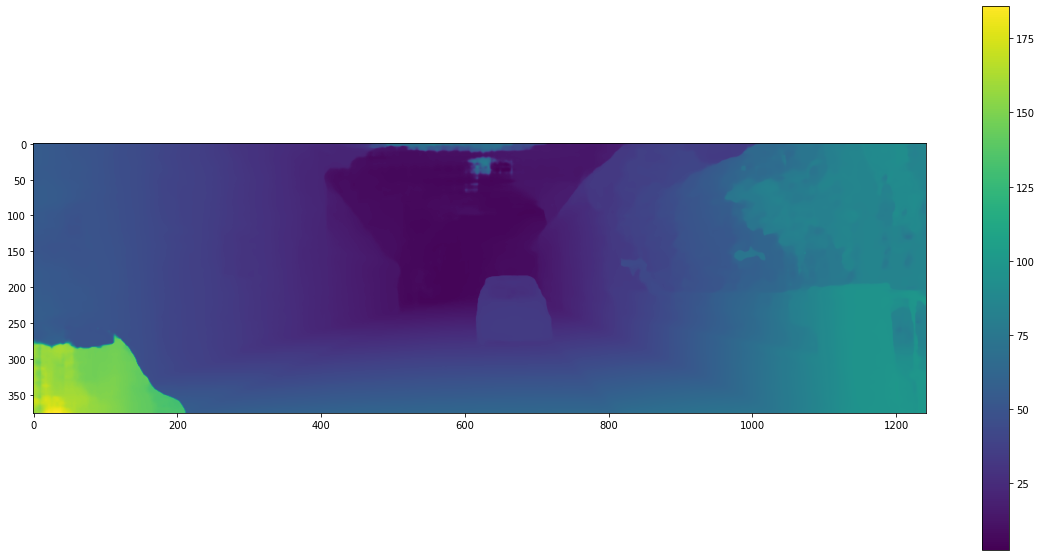

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
# disp = plt.imread('./result/psmnet_disparity/000003.png')*256
import imageio
disp = imageio.imread('./result/psmnet_disp_all/000003.png')/256
#disp = imageio.imread('./KITTI/object/training/disparity/000003.png')/256
disp = (disp*256).astype(np.uint16)/256
print(disp[200:210,150:160])
print(disp)
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()

[[18.4140625  18.41796875 18.41796875 18.41796875 18.4140625  18.4140625
  18.41015625 18.40625    18.39453125 18.3828125 ]
 [18.421875   18.421875   18.421875   18.421875   18.41796875 18.41796875
  18.4140625  18.4140625  18.40234375 18.38671875]
 [18.421875   18.421875   18.421875   18.421875   18.41796875 18.41796875
  18.41796875 18.4140625  18.40234375 18.38671875]
 [18.421875   18.421875   18.421875   18.421875   18.41796875 18.41796875
  18.41796875 18.4140625  18.40234375 18.38671875]
 [18.421875   18.421875   18.421875   18.421875   18.41796875 18.41796875
  18.41796875 18.4140625  18.40234375 18.38671875]
 [18.421875   18.421875   18.421875   18.421875   18.41796875 18.41796875
  18.4140625  18.41015625 18.3984375  18.38671875]
 [17.6015625  17.6015625  17.6015625  17.6015625  17.6015625  17.6015625
  17.59765625 17.58984375 17.58203125 17.5703125 ]
 [14.33984375 14.33984375 14.34375    14.34375    14.34375    14.33984375
  14.33984375 14.3359375  14.33203125 14.328125  ]
 [

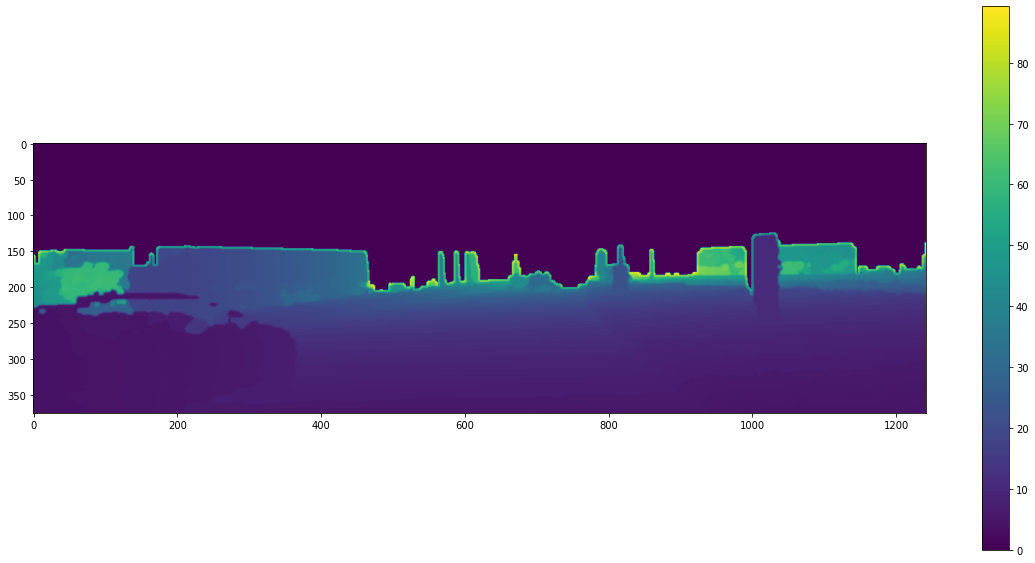

In [57]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
# disp = plt.imread('./result/psmnet_disparity/000003.png')*256
import imageio
#disp = imageio.imread('./result/gwcnet12_disparity/000003.png')/256
#disp = imageio.imread('/home/maxc303/aer1515/ip_basic/demos/outputs/depth_test_000/000016.png')/256
disp = imageio.imread('/home/maxc303/aer1515/ip_basic/demos/outputs/kitti_depth_ipbasic/000016.png')/256
#disp = imageio.imread('/home/maxc303/Kitti/object/training/disp_pl/000003.png')/256

import scipy as sp
import scipy.ndimage
disp = sp.ndimage.maximum_filter(disp,3)
print(disp[200:210,150:160])
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()

#psmnet_disp = imageio.imread('./result/psmnet_disparity/000003.png')/256
gwc_disp = disp


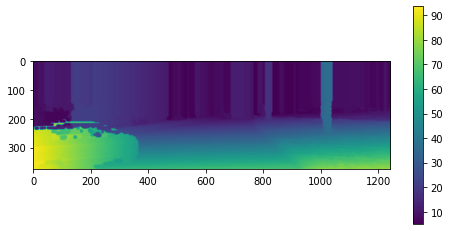

In [26]:
calib_file = './KITTI/object/training/calib/000003.txt'
import sys
sys.path.append('../')
import preprocessing.kitti_util as kitti_util
calib = kitti_util.Calibration(calib_file)
disp[disp < 0] = 0
baseline = 0.54
mask = disp > 0
depth = calib.f_u * baseline / (disp + 1. - mask)
plt.figure(figsize = (8,4))
plt.imshow(depth, cmap="viridis")
plt.colorbar()
plt.show()

[[-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [  45.00077862 -389.630358     44.79390018 -389.630358   -389.630358
    44.5074811  -389.630358   -389.630358   -389.630358     44.24479293]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358   -389.630358   -389.630358   -389.630358   -389.630358
  -389.630358   -389.630358   -389.630358   -389.630358   -389.630358  ]
 [-389.630358     44.99884189 -389.630358   -389.630358     44.76631498
  -389.630358   -389.630358     44.4245183  -389.630358   -389.630358 

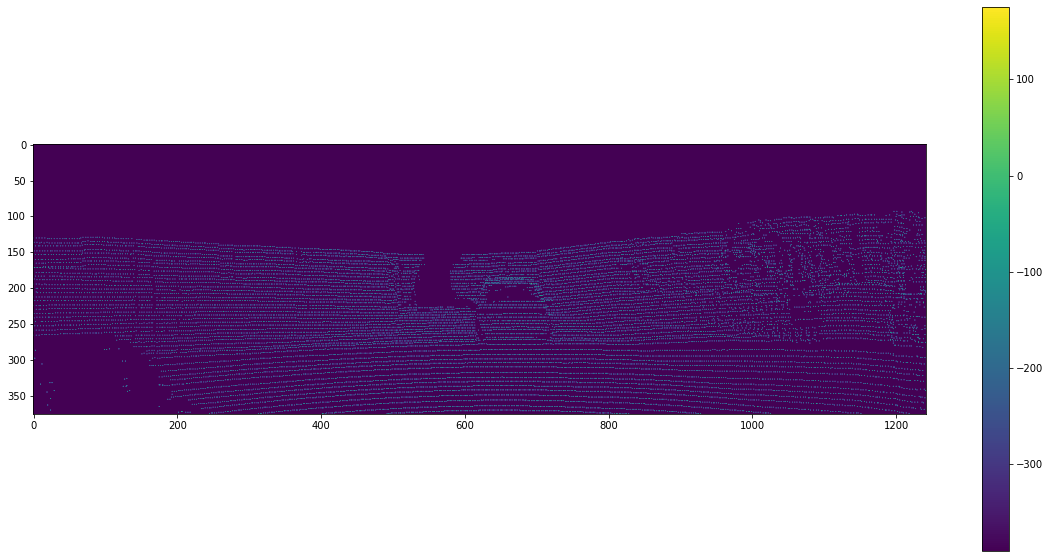

In [13]:
import preprocessing.generate_disp as generate_disp
height, width = depth.shape[:2]
pc_velo = np.fromfile(str("./KITTI/object/training/velodyne/000003.bin"), dtype=np.float32).reshape((-1, 4))[:, :3]

pts_2d = calib.project_velo_to_image(pc_velo)
fov_inds = (pts_2d[:, 0] < width - 1) & (pts_2d[:, 0] >= 0) & \
           (pts_2d[:, 1] < height - 1) & (pts_2d[:, 1] >= 0)
fov_inds = fov_inds & (pc_velo[:, 0] > 2)
imgfov_pc_velo = pc_velo[fov_inds, :]
imgfov_pts_2d = pts_2d[fov_inds, :]
imgfov_pc_rect = calib.project_velo_to_rect(imgfov_pc_velo)
depth_map = np.zeros((height, width)) - 1
imgfov_pts_2d = np.round(imgfov_pts_2d).astype(int)
for i in range(imgfov_pts_2d.shape[0]):
    depth = imgfov_pc_rect[i, 2]
    depth_map[int(imgfov_pts_2d[i, 1]), int(imgfov_pts_2d[i, 0])] = depth
baseline = 0.54
disp_map = (calib.f_u * baseline) / depth_map
print(disp_map[200:210,150:160])

plt.figure(figsize = (20,10))
plt.imshow(disp_map, cmap="viridis")
plt.colorbar()
plt.show()

<Figure size 1440x720 with 0 Axes>

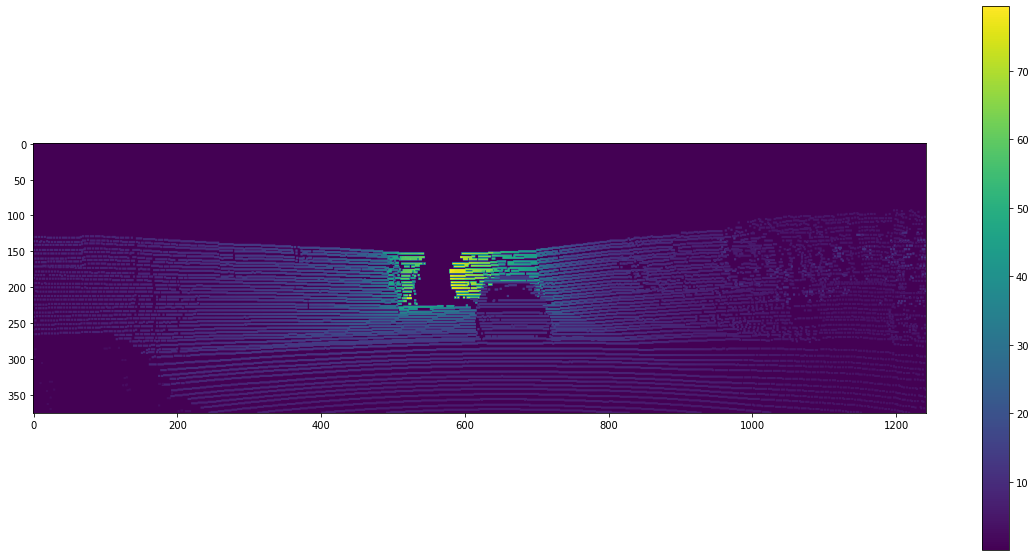

In [76]:
disp_map = np.load('000003.npy')
plt.figure(figsize = (20,10))
mask = disp_map > 0
disp_map = disp_map*mask
import scipy as sp
import scipy.ndimage
disp_map = sp.ndimage.maximum_filter(disp_map,3)

# # disp_map = disp_map*mask
# plt.imshow(disp_map, cmap="viridis")
# plt.colorbar()
# plt.show()

disp_map[disp_map <= 0] = 10000
baseline = 0.54
mask = disp_map > 0
depth_map = calib.f_u * baseline / (disp_map + 1. - mask)
plt.figure(figsize = (20,10))
plt.imshow(depth_map, cmap="viridis")
plt.colorbar()
plt.show()

In [10]:
#Visualize
pointcloud = np.fromfile(str("./result/psmnet_semantic_pl/"+index), dtype=np.float32, count=-1).reshape([-1,4])

print(pointcloud.shape)
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

vals='height'
if vals == "height":
    col = z
else:
    col = d

fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     # color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)

(165142, 4)


In [16]:
#Script for comparing pseudo lidar and True value.
index = "000000.bin"
#pointcloud = np.fromfile(str("/home/maxc303/aer1515/OpenPCDet/data/kitti/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud = np.fromfile(str("/home/maxc303/link_aer1515/pseudo_lidar/result/demi/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud1 = np.fromfile(str("/home/maxc303/link_aer1515/pseudo_lidar/result/kitti_ipbasic_pl/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("/home/maxc303/aer1515/OpenPCDet/data/kitti/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("/home/maxc303/Kitti/object/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("./result/gwcnet12_pl_all/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("./result/gwcnet12_pseudo/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud1 = np.fromfile(str("../pseudo-lidar_velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("./result/psmnet_pl_all/"+index), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud1 = np.fromfile(str("./KITTI/object/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

x1 = pointcloud1[:, 0]  # x position of point
y1 = pointcloud1[:, 1]  # y position of point
z1 = pointcloud1[:, 2]  # z position of point
r1 = pointcloud1[:, 3]  # reflectance value of point
d1 = np.sqrt(x1 ** 2 + y1 ** 2)  # Map Distance from sensor
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(1, 0, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

mayavi.mlab.points3d(x1, y1, z1,
                     d1,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
x1=np.linspace(5,5,50)
y1=np.linspace(0,0,50)
z1=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.plot3d(x1,y1,z1)